# **Import libraries**

In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install word2number

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz
from word2number import w2n
from sklearn.preprocessing import MultiLabelBinarizer
import ast
from fuzzywuzzy import process

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Upload data**

In [ ]:
train=pd.read_csv('/content/train_datathon_fin.csv')
test = pd.read_csv('/content/test_datathon_fin(1).csv')

let's discover the fulll subsets

In [ ]:
pd.set_option("display.max_columns", None)
train.head()

,Person Description,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Package Weight
0,"Single Female with four children, education: b...",$10K+,"Cleaning Supplies from Household department, O...",28.1997,-26.6008,recyclable,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,deluxe,8.76 Millions,4.2924 Millions,2037.64,481.98,323,602.7575,FLORIANOPOLIS,5C,amount: -27.591715047463765,-48.506655980581606,navegantes,sC,-26.85907968190116,-48.63953562951828,5.0,NaN,NaN
1,Single Female with three children and educatio...,€42K+,"Snack Foods from Snack Foods department, Order...",16.571,14.972,non recyclable,NaN,Budget Bargains,Supermarket,$6.36 Millions,1.9716 Millions,2049.72,457.36,NaN,708.665,abaete,MG,-19.16050583709177,-45.45377571289521,betim,MG,-19.95866259017359,-44.19878943272789,4.0,NaN,NaN
2,"MaRrIeD MaLe wItH TwO ChIlDrEn,eDuCaTiOn: HiGh...",30K+,"Magazines from Periodicals department, Ordered...",-28.6358,data: 27.1822,recyclable,['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,1322.21,523.32,348.85,val: 564.2647,Sao PauLo,Sp,data: -23.50609758451153,-46.73241237719997,PRAIE GRANDE,$P,-24.026786758814687,-46.49304889148245,5.0,NaN,NaN
3,"Single Female with three children, education: ...",30K+ annually,"Dairy from Dairy department, Ordered Brand : C...",14.2161,amount: 11.2944,recyclable,['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,NaN,440.92,293.95,724.5119,sao paulo,SP,-23.665780780743223,-46.6821276135092,Sao Paulo,SP,-23.69289565500035,-46.68021046531817,1.0,NaN,NaN
4,"Married Female with five children , education:...",50000,"Vegetables from Produce department, Ordered Br...",12.6172,9.71,non recyclable,"['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,"11.56 ,000,000illions",4.9708 Millions,1872.19,593.93,395.95,519.7574,capivari,SP,-23.0122137105142,-47.52203973160603,sao paulo,\tSP,val: -23.539824031911863,-46.434679443937874,5.0,NaN,NaN


In [ ]:
test.head()

,Person Description,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score
0,"Single Male with four children, education: par...","Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,-31.8337,28.7811,3.05 kg,yes,50K+,2201.06,1424.85,465.54,308.73,florianopol1s,sc,-27.591715047463765,-48.506655980581606,navegantes,sç,-26.85907968190116,-48.63953562951828,5.0
1,"Married Female with three children, education:...","Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.944,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59,abaete,MG,measure: -19.16050583709177,-45.45377571289521,betim,mg,-19.95866259017359,data: -44.19878943272789,4.0
2,"sINGLE fEMALE WITH THREE CHILDREN, EDUCATION: ...","Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,€1.6M,0.8235 Millions,29.2172,26.31,2.9072,no,130K+,2837.58,2038.11,481.98,321.26,sao paulo,sP,-23.50609758451153,-46.73241237719997,PrAIa grandE,SP,-24.026786758814687,measure: -46.49304889148245,5.0
3,"Single Male with three children, education: pa...","Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,_Deluxe,$8.82 Millions,4.41 Millions,28.0543,val: 25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58,sao paulo,\tSP,-23.665780780743223,-46.6821276135092,sao paulo,SP,-23.69289565500035,-46.68021046531817,1.0
4,"Single Male w/ two children, education: High S...","Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,"4.32 ,000,000illions",1.9872 Millions,23.5482,-20.641,2.9072,no,30K+,2193.97,1320.15,523.32,348.85,capivari,SP,data: -23.0122137105142,measure: -47.52203973160603,sao paulo,SP,-23.539824031911863,-46.434679443937874,5.0


### **Features:**

* Person Description:Details about the individual visiting the market

* Customer Order:The order details (item, department, brand)

* Additional Features in market -- List of amenities or special features available in the market

* Promotion Name:Name of the promotional campaign run by the market

* Store Kind:Type or category of the store (e.g., supermarket, grocery store)

* Store Cost :Initial investment or cost to establish the store

* Store Sales :Total sales revenue generated by the store since opening

* Gross Weight : Total weight of the purchased order including packaging

* Net Weight:Weight of the purchased items excluding packaging

* Package Weight : Weight of the packaging material for the order

* Is Recyclable? :Indicates if the purchased item is recyclable (Yes/No)

* Yearly Income :Minimum annual income of the consumer

* Store Area :Total area of the store (in square meters)

* Grocery Area : Area dedicated to groceries within the store

* Frozen Area :Area dedicated to frozen foods within the store

* Meat Area :Area dedicated to meat products within the store

* Customer City :City where the customer resides

* Customer State :State where the customer resides

* Customer Latitude :Geographic latitude of the customer's location

* Customer Longitude :Geographic longitude of the customer's location

* Seller City :City where the market/store is located

* Seller State :State where the market/store is located

* Seller Latitude :Geographic latitude of the market/store location

* Seller Longitude :Geographic longitude of the market/store location

* Review Score : Rating given by the customer to the market/store

* Cost :Total cost of the order


# **Explore Data**

In [ ]:
train.shape

(41582, 26)

In [ ]:
train.info()
#Data types -_-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41582 entries, 0 to 41581
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Person Description             41552 non-null  object
 1   Yearly Income                  41538 non-null  object
 2   Customer Order                 41559 non-null  object
 3   Gross Weight                   39304 non-null  object
 4   Net Weight                     39112 non-null  object
 5   Is Recyclable?                 41541 non-null  object
 6   Additional Features in market  36959 non-null  object
 7   Promotion Name                 35316 non-null  object
 8   Store Kind                     35328 non-null  object
 9   Store Sales                    41536 non-null  object
 10  Store Cost                     41549 non-null  object
 11  Grocery Area                   37718 non-null  object
 12  Frozen Area                    37759 non-null  object
 13  M

In [ ]:
(train.isna().sum()/len(train))*100

,0
Person Description,0.072147
Yearly Income,0.105815
Customer Order,0.055312
Gross Weight,5.478332
Net Weight,5.940070
Is Recyclable?,0.098600
Additional Features in market,11.117791
Promotion Name,15.069020
Store Kind,15.040162
Store Sales,0.110625


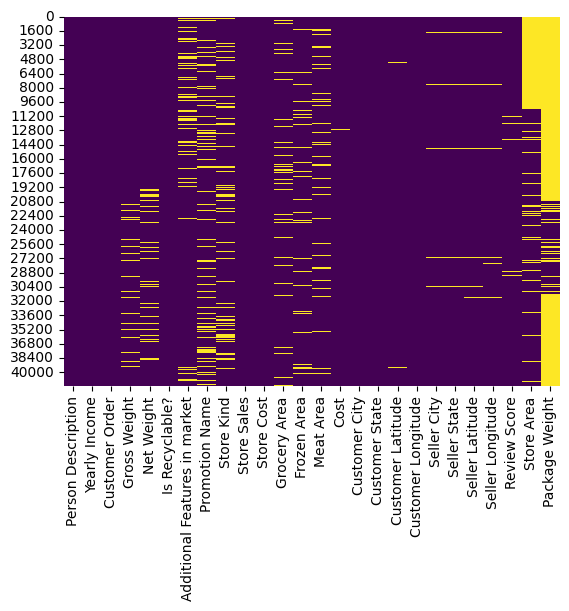

In [ ]:
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
train.duplicated().sum()

np.int64(928)

In [ ]:
train.drop_duplicates(inplace=True)

In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
train.shape

(40654, 26)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Person Description             19927 non-null  object
 1   Customer Order                 19924 non-null  object
 2   Additional Features in market  19923 non-null  object
 3   Promotion Name                 19908 non-null  object
 4   Store Kind                     19893 non-null  object
 5   Store Sales                    19929 non-null  object
 6   Store Cost                     19919 non-null  object
 7   Gross Weight                   19181 non-null  object
 8   Net Weight                     19117 non-null  object
 9   Package Weight                 19927 non-null  object
 10  Is Recyclable?                 19930 non-null  object
 11  Yearly Income                  19930 non-null  object
 12  Store Area                     18935 non-null  object
 13  G

In [ ]:
(test.isna().sum()/len(test))*100

,0
Person Description,0.075218
Customer Order,0.090262
Additional Features in market,0.095276
Promotion Name,0.170494
Store Kind,0.245713
Store Sales,0.065189
Store Cost,0.115334
Gross Weight,3.816067
Net Weight,4.136997
Package Weight,0.075218


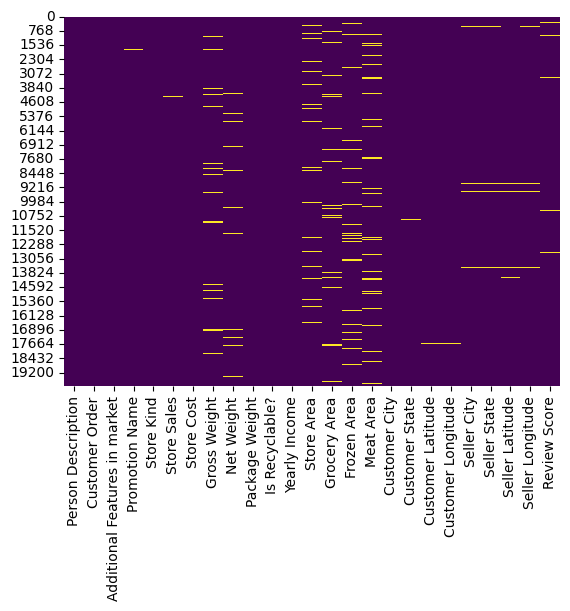

In [ ]:
sns.heatmap(test.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
test.duplicated().sum()
#even if there are duplicates -->we will never remove them

np.int64(0)

In [ ]:
weird_values = ['-999', '-1', 'TBD','To Be Determined','Not Available', 'Not Specified', 'unknown', 'missing', '###', '--', '[]', 'Data Missing', 'nil', '...', '?','-1.0','0.1 ','0.1','Nan', 'nan', 'NaN', ' None', 'NONE', '']

def clean_weird_values(df, weird_values):
    for col in df.columns:
        df[col] = df[col].replace(weird_values, np.nan)
    return df


train = clean_weird_values(train, weird_values)

In [ ]:
train.isna().sum()

,0
Person Description,117
Yearly Income,130
Customer Order,116
Gross Weight,2573
Net Weight,2723
Is Recyclable?,119
Additional Features in market,9074
Promotion Name,6160
Store Kind,6123
Store Sales,120


# **Person Description**

In [ ]:
train['Person Description'].value_counts(dropna = False)

,count
Person Description,
"Single Male with one child, education: bachelors degree working as professional",383
"Married Male with three children, education: bachelors degree working as professional",343
"Married Female with four children, education: bachelors degree working as professional",331
"Married Female with four children, education: partial high school working as skilled manual",309
"Single Female with one child, education: bachelors degree working as professional",273
...,...
"Married Male with two kids, education: partial HS working as skilled manual.",1
"Married Female with four childran, education: high school degree working as professional.",1
"Single Male W/ Four Children, Education: Batchelors Degree Working As Professional",1


In [ ]:
train['Person Description']

,Person Description
0,"Single Female with four children, education: b..."
1,Single Female with three children and educatio...
2,"MaRrIeD MaLe wItH TwO ChIlDrEn,eDuCaTiOn: HiGh..."
3,"Single Female with three children, education: ..."
4,"Married Female with five children , education:..."
...,...
41574,"Married Male with four kidren, education: part..."
41577,"Married Female with one child, education: bach..."
41578,"Married Female with two children, education: p..."
41579,"Married Female with three children, education:..."


In [ ]:


def extract_info(desc):
    if pd.isnull(desc):
        return pd.Series([None, None, None, None, None])

    desc = str(desc).lower().strip()
    desc = desc.replace("_", " ")
    desc = desc.replace(" and ", ", ")
    desc = re.sub(r'\s+', ' ', desc)

    # if desc in ["nil", "missing", "###", "to be determined", "-999", "?", "nan"]:
    #     return pd.Series([None, None, None, None, None])


    if "single" in desc:
        marital = "Single"
    elif re.search(r'mar+ie*d?', desc):

        marital = "Married"
    else:
        marital = None


    gender = "Female" if "female" in desc  else "Male" if "male" in desc else None


    child_match = re.search(r'(one|two|three|four|five|six|seven|eight|nine|ten)\s+(child|children|kid|kids|kidren)', desc)
    if child_match:
        children = w2n.word_to_num(child_match.group(1))
    elif re.search(r'no\s+(child|children|kid|kids|kidren)', desc):
        children = 0
    else:
        children = None


    edu_match = re.search(r'education[:\s]*(.+?)\s+working', desc)
    education = edu_match.group(1).strip().title() if edu_match else None


    occ_match = re.search(r'working as ([a-z\s]+)', desc)
    occupation = occ_match.group(1).strip().title() if occ_match else None

    return pd.Series([marital, gender, children, education, occupation])


In [ ]:
train[["Marital_Status", "Gender", "Children", "Education", "Occupation"]] = train["Person Description"].apply(extract_info)


In [ ]:
train.head()

,Person Description,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Package Weight,Marital_Status,Gender,Children,Education,Occupation
0,"Single Female with four children, education: b...",$10K+,"Cleaning Supplies from Household department, O...",28.1997,-26.6008,recyclable,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,deluxe,8.76 Millions,4.2924 Millions,2037.64,481.98,323,602.7575,FLORIANOPOLIS,5C,amount: -27.591715047463765,-48.506655980581606,navegantes,sC,-26.85907968190116,-48.63953562951828,5.0,NaN,NaN,Single,Female,4.0,Bachelor'Ss Degree,Professional
1,Single Female with three children and educatio...,€42K+,"Snack Foods from Snack Foods department, Order...",16.571,14.972,non recyclable,NaN,Budget Bargains,Supermarket,$6.36 Millions,1.9716 Millions,2049.72,457.36,NaN,708.665,abaete,MG,-19.16050583709177,-45.45377571289521,betim,MG,-19.95866259017359,-44.19878943272789,4.0,NaN,NaN,Single,Female,3.0,Bachelors Degree,Management
2,"MaRrIeD MaLe wItH TwO ChIlDrEn,eDuCaTiOn: HiGh...",30K+,"Magazines from Periodicals department, Ordered...",-28.6358,data: 27.1822,recyclable,['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,1322.21,523.32,348.85,val: 564.2647,Sao PauLo,Sp,data: -23.50609758451153,-46.73241237719997,PRAIE GRANDE,$P,-24.026786758814687,-46.49304889148245,5.0,NaN,NaN,Married,Male,2.0,High School Degree,Skilled Manual
3,"Single Female with three children, education: ...",30K+ annually,"Dairy from Dairy department, Ordered Brand : C...",14.2161,amount: 11.2944,recyclable,['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,NaN,440.92,293.95,724.5119,sao paulo,SP,-23.665780780743223,-46.6821276135092,Sao Paulo,SP,-23.69289565500035,-46.68021046531817,1.0,NaN,NaN,Single,Female,3.0,Partial College,Professional
4,"Married Female with five children , education:...",50000,"Vegetables from Produce department, Ordered Br...",12.6172,9.71,non recyclable,"['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,"11.56 ,000,000illions",4.9708 Millions,1872.19,593.93,395.95,519.7574,capivari,SP,-23.0122137105142,-47.52203973160603,sao paulo,\tSP,val: -23.539824031911863,-46.434679443937874,5.0,NaN,NaN,Married,Female,5.0,Bachelors Degree,Professional


# **Marital_Status**

In [ ]:
train['Marital_Status'].value_counts(dropna = False)

,count
Marital_Status,
Single,20497
Married,20040
None,117


In [ ]:
'''we did this to see why thw high no of nulls -->
was because of the mistaken written of the records of person description col -->
so edit the  extract_info function'''

missing_marital = train[train["Marital_Status"].isna() | (train["Marital_Status"] == "None")]
print(missing_marital[["Person Description"]].head(20))

      Person Description
42                   NaN
158                  NaN
234                  NaN
245                  NaN
1208                 NaN
1501                 NaN
1572                 NaN
2971                 NaN
3582                 NaN
4165                 NaN
5112                 NaN
5714                 NaN
6460                 NaN
7078                 NaN
7245                 NaN
8768                 NaN
8814                 NaN
9745                 NaN
9988                 NaN
10295                NaN


In [ ]:
train['Marital_Status'].isna().sum()

np.int64(117)

In [ ]:

train["Marital_Status"] = train["Marital_Status"].fillna(train["Marital_Status"].mode()[0] )

In [ ]:
train['Marital_Status'].isna().sum()

np.int64(0)

# **Gender**

In [ ]:
train['Gender'].value_counts(dropna = False)

,count
Gender,
Female,20787
Male,19750
None,117


In [ ]:
train['Gender'].isna().sum()

np.int64(117)

In [ ]:
train["Gender"] = train["Gender"].fillna(train["Gender"].mode()[0] )

In [ ]:
train['Gender'].isna().sum()

np.int64(0)

# **Yearly Income**

In [ ]:
train['Yearly Income'].value_counts(dropna = False)

,count
Yearly Income,
30K+,8504
10K+,5544
50K+,4585
70K+,3272
130K+,1448
...,...
110K+ annually,1
10K Or More,1
50K,1


In [ ]:
train['Yearly Income'].isna().sum()

np.int64(130)

In [ ]:
#for check
val_counts = train["Yearly Income"].value_counts(dropna=False)


non_numeric_values = [
    '...', '?', 'nil', 'missing', 'To Be Determined',
    'TBD', 'Not Specified', 'Data Missing', 'Not Available',
    '-999', '-1', '###'
]


for val in non_numeric_values:
    count = (train["Yearly Income"] == val).sum()
    print(f"{val}: {count} occurrence(s)")

...: 0 occurrence(s)
?: 0 occurrence(s)
nil: 0 occurrence(s)
missing: 0 occurrence(s)
To Be Determined: 0 occurrence(s)
TBD: 0 occurrence(s)
Not Specified: 0 occurrence(s)
Data Missing: 0 occurrence(s)
Not Available: 0 occurrence(s)
-999: 0 occurrence(s)
-1: 0 occurrence(s)
###: 0 occurrence(s)


In [ ]:

#many strange values -_-
train['Yearly Income'].unique()[:150]


array(['$10K+', '€42K+', '30K+', '30K+ annually', '50000', '130K+',
       '10K+', '50K+', '70 Thousand', '30 Thousand', '110K+', '$90K+',
       '70K+', 'Income: 30K+', '10K or more', '130k', 'Income: 130K+',
       '€59K+', '$30K+', '360+ monthly', '90K+', '150K+', '€25K+',
       '600+ monthly', '70K+ annually', '10k', '50k', '€8K+', '30000',
       '10 Thousand', '1800+ monthly', '70000', nan, '30k',
       '130K+ annually', '1320+ monthly', '70K or more', '840+ monthly',
       '10000', 'Income: 10K+', '50K+ annually', '€93K+', '90K or more',
       '$70K+', '10K+ annually', '50 Thousand', 'Income: 90K+', '$50K+',
       '150K or more', '90000', '30K or more', '130K or more',
       '50K or more', 'Income: 110K+', '130000', '120+ monthly',
       '110K+ annually', '150k', 'Income: 50K+', '70k', '90 Thousand',
       '1080+ monthly', '110000', 'Income: 70K+', '€110K+',
       '1560+ monthly', '110k', 'Income: 150K+', '$130K+', '€127K+',
       '150K+ annually', '110K or more', '90k

In [ ]:
'''I decided to clean this column first as it will be used in the imputation of next columns'''


# def clean_yearly_income(val):
#     if pd.isna(val):
#         return np.nan

#     s = str(val).lower().strip()


#     for token in ["income:", "€", "$", ",", "or more", "annually", "annual", "(", ")", ".","-1","-999"]:
#         s = s.replace(token, "")


#     monthly = "monthly" in s
#     s = s.replace("monthly", "")


#     s = s.replace("+", "")

#     s = s.strip()


#     multiplier = 1
#     if "thousand" in s:
#         multiplier = 1000
#         s = s.replace("thousand", "")
#     elif "k" in s:
#         multiplier = 1000
#         s = s.replace("k", "")

#     s = s.strip()

#     try:
#         val = float(s) * multiplier
#         if monthly:
#             val *= 12
#         return val
#     except:
#         return np.nan


# train["Yearly Income"] = train["Yearly Income"].apply(clean_yearly_income)




'I decided to clean this column first as it will be used in the imputation of next columns'

In [ ]:
def clean_yearly_income(val):
    if pd.isna(val):
        return np.nan

    s = str(val).lower().strip()


    for token in [
        "income:", "€", "$", ",", "or more", "+", "annually",
        "annual", "(", ")", ".", "-1", "-999"
    ]:
        s = s.replace(token, "")

    monthly = "monthly" in s
    s = s.replace("monthly", "")

    s = s.strip()


    multiplier = 1
    if "thousand" in s:
        multiplier = 1000
        s = s.replace("thousand", "")
    elif "k" in s:
        multiplier = 1000
        s = s.replace("k", "")

    s = s.strip()


    try:
        val = float(s) * multiplier
        if monthly:
            val *= 12
        return val
    except:
        return np.nan
train["Yearly Income"] = train["Yearly Income"].apply(clean_yearly_income)

In [ ]:
train['Yearly Income'].value_counts(dropna = False)

,count
Yearly Income,
30000.0,11994
10000.0,8033
50000.0,6499
70000.0,4619
130000.0,2092
90000.0,1732
110000.0,1690
150000.0,771
4320.0,531


In [ ]:
train['Yearly Income'].unique()[:100]

array([ 10000.,  42000.,  30000.,  50000., 130000.,  70000., 110000.,
        90000.,  59000.,   4320., 150000.,  25000.,   7200.,   8000.,
        21600.,     nan,  15840.,  10080.,  93000.,   1440.,  12960.,
        18720., 127000.,  76000.])

In [ ]:
train['Yearly Income'].isna().sum()

np.int64(130)

In [ ]:
''' i think income is related to these 3 columns so i used the group of them to fill'''

def fill_income_by_group(df, income_col="Yearly Income"):

    df[income_col] = df.groupby(["Occupation", "Education", "Customer City"])[income_col].transform(
        lambda x: x.fillna(x.median())
    )

    overall_median = df[income_col].median()
    df[income_col].fillna(overall_median, inplace=True)

    return df


train = fill_income_by_group(train)

In [ ]:
train['Yearly Income'].isna().sum()

np.int64(0)

# **Customer Order**

In [ ]:
train['Customer Order'].value_counts(dropna = False)

,count
Customer Order,
"Snack Foods from Snack Foods department, Ordered Brand : Horatio",979
"Snack Foods from Snack Foods department, Ordered Brand : Nationeel",954
"Snack Foods from Snack Foods department, Ordered Brand : Fast",928
"Snack Foods from Snack Foods department, Ordered Brand : Fort West",921
"Snack Foods from Snack Foods department, Ordered Brand : Best Choice",843
...,...
"Snack Foods from Snack Foods department, Ordered Brand : Best Choice.",1
"(Electrical from Household department, Ordered Brand : Red Wing)",1
"Bread from Baked Goods department, Ordered Brand : Sphinx.",1


In [ ]:
train['Customer Order']

,Customer Order
0,"Cleaning Supplies from Household department, O..."
1,"Snack Foods from Snack Foods department, Order..."
2,"Magazines from Periodicals department, Ordered..."
3,"Dairy from Dairy department, Ordered Brand : C..."
4,"Vegetables from Produce department, Ordered Br..."
...,...
41574,"Snack Foods from Snack Foods department, Order..."
41577,"Specialty from Produce department, Ordered Bra..."
41578,"Fruit from Produce department, Ordered Brand :..."
41579,"PAPER PRODUCTS FROM HOUSEHOLD DEPARTMENT, ORDE..."


In [ ]:
train['Customer Order'].isna().sum()

np.int64(116)

In [ ]:
def handle_customer_order(df, order_col="Customer Order"):

    df[order_col] = df[order_col].str.lower()


    df[order_col] = df[order_col].str.replace(r'[\(\)]', '', regex=True)


    df["Product_Type"] = df[order_col].str.extract(r'^(.*?) from', expand=False).str.strip()


    df["Order_Department"] = df[order_col].str.extract(r'from (.*?) department', expand=False).str.strip()


    df["Ordered_Brand"] = df[order_col].str.extract(r'ordered brand : (.*)', expand=False).str.strip().str.rstrip(".")

    return df


train = handle_customer_order(train)

# **Product_Type**

In [ ]:
train['Product_Type'].value_counts(dropna = False)

,count
Product_Type,
vegetables,5124
snack foods,4636
dairy,2527
fruit,2098
meat,2084
jams and jellies,1714
breakfast foods,1283
baking goods,1278
bread,1196


In [ ]:
train['Product_Type'].isna().sum()

np.int64(116)

In [ ]:
train['Product_Type'].fillna("unknown", inplace=True)

In [ ]:
train['Product_Type'].isna().sum()

np.int64(0)

In [ ]:
train['Product_Type'].value_counts(dropna = False)

,count
Product_Type,
vegetables,5124
snack foods,4636
dairy,2527
fruit,2098
meat,2084
jams and jellies,1714
breakfast foods,1283
baking goods,1278
bread,1196


# **Order_Department**

In [ ]:
train['Order_Department'].value_counts(dropna = False)

,count
Order_Department,
produce,5832
snack foods,4636
household,4221
frozen foods,4121
baking goods,2992
canned foods,2831
health and hygiene,2528
dairy,2527
beverages,1990


In [ ]:
train['Order_Department'].isna().sum()

np.int64(116)

In [ ]:
train['Order_Department'].fillna("unknown", inplace=True)

In [ ]:
train['Order_Department'].isna().sum()

np.int64(0)

# **Ordered_Brand**

In [ ]:
train['Ordered_Brand'].value_counts(dropna = False)

,count
Ordered_Brand,
hermanos,1263
ebony,1206
tell tale,1169
tri-state,1102
high top,1092
...,...
prelude,34
symphony,33
adj,31


In [ ]:
train['Ordered_Brand'].isna().sum()

np.int64(116)

In [ ]:
train['Ordered_Brand'].fillna("unknown", inplace=True)

In [ ]:
train['Ordered_Brand'].isna().sum()

np.int64(0)

# **Children**

In [ ]:
train['Children'].value_counts(dropna = False)

,count
Children,
2.0,8392
4.0,8359
3.0,8022
1.0,7902
5.0,4056
0.0,3806
NaN,117


In [ ]:
train['Children'].isna().sum()

np.int64(117)

All these checks was before i used the function clean_weird_values

In [ ]:
''' this code was just to check that the function got exactly the no of children correctly'''

missing_children = train[train['Children'].isna()]
print(missing_children[['Person Description', 'Children']].head(20))

      Person Description  Children
42                   NaN       NaN
158                  NaN       NaN
234                  NaN       NaN
245                  NaN       NaN
1208                 NaN       NaN
1501                 NaN       NaN
1572                 NaN       NaN
2971                 NaN       NaN
3582                 NaN       NaN
4165                 NaN       NaN
5112                 NaN       NaN
5714                 NaN       NaN
6460                 NaN       NaN
7078                 NaN       NaN
7245                 NaN       NaN
8768                 NaN       NaN
8814                 NaN       NaN
9745                 NaN       NaN
9988                 NaN       NaN
10295                NaN       NaN


In [ ]:

def fill_children_by_group(df):

   df["Children"] = (
        df.groupby(["Marital_Status", "Product_Type"])["Children"]
        .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

        .fillna(df["Children"].mode()[0])
    )
   return df



train = fill_children_by_group(train)


In [ ]:
train['Children'].isna().sum()

np.int64(0)

# **Education**

In [ ]:
train['Education'].value_counts(dropna = False)

,count
Education,
Partial High School,11424
High School Degree,11194
Bachelors Degree,9889
Partial College,3482
Graduate Degree,2055
Partial Hs,768
Hs Degree,761
Bachelor'Ss Degree,607
Bachelos Degree,119


In [ ]:
train['Education'].isna().sum()

np.int64(117)

In [ ]:
def fill_education_by_income(df, income_col="Yearly Income", edu_col="Education"):

    df["Income_Bin"] = pd.qcut(df[income_col], q=3, labels=["Low", "Medium", "High"])


    df[edu_col] = df.groupby("Income_Bin")[edu_col].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
    ).fillna(df[edu_col].mode()[0])

    df.drop("Income_Bin", axis=1, inplace=True)

    return df


train = fill_education_by_income(train)

In [ ]:
train['Education'].isna().sum()

np.int64(0)

# **Occupation**

In [ ]:
train['Occupation'].value_counts(dropna = False)

,count
Occupation,
Professional,13401
Skilled Manual,10678
Manual,9871
Management,5857
Clerical,730
None,117


In [ ]:
train['Occupation'].isna().sum()

np.int64(117)

In [ ]:
def fill_occupation(df,income_col="Yearly Income", occ_col="Occupation"):
    df["Income_Bin"] = pd.qcut(df[income_col], q=3, labels=["Low", "Medium", "High"])
    df[occ_col] = df.groupby("Income_Bin")[occ_col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)).fillna(df[occ_col].mode()[0])

    return df
train = fill_occupation(train)

In [ ]:
train['Occupation'].isna().sum()

np.int64(0)

# **Net Weight**

In [ ]:
train['Net Weight'].value_counts(dropna = False)

,count
Net Weight,
NaN,2723
23.5482,516
16.8617,459
15.4081,428
27.1822,394
...,...
data: 13.6492,1
10.8729,1
12.3991.,1


In [ ]:
train['Net Weight'].unique()[:150]

array(['-26.6008', '14.972', 'data: 27.1822', 'amount: 11.2944', '9.71',
       '13.9545', '14245.20 grams', '-14.376', '23.5482', '12.0648',
       '21.8039', '8.1837', '24.4204', 'amount: 21.2225', '15.4081',
       '7.4279', '21.5132', '12.7916', '21.2225', '20.0596', '10.7566',
       '25.7286', '12.1956', 'measure: 13.6492', 'measure: 15.4081',
       '17.5885', '20.3503', '12.5009', '14.376', '8.6634', '12.6317',
       '-24.275', '19.7689', 'amount: 12.966', '6.3667', '11.2072',
       '8.8233', '-15.6988', '26.8915', '26.4554', 'amount: 7.4569',
       '8.52 kg', '9.4629', '-26.4554', '14.6813', '-16.4256',
       'measure: 5.7272', '29.944', nan, '8.9977', '10.3205', '-25.874',
       '25.1472', '8.4018', 'measure: 28.6358', 'measure: 13.2277',
       '25.0018', '9.0559', 'data: 9.9571', '19.3328', '24.1296',
       '10.8729', '20.641', '9.4193', '17.8792', '9.8844', '-14.5359',
       '25.874', '15.9895', '30.0894', '17.4431', '9.9716', '-10.1752',
       '27.909', '-21.3678'

In [ ]:

def clean_weight_columns_no_package(df, gross_col, net_col, group_col=None):
    cols = [gross_col, net_col]
    eps = 1e-9


    for col in cols:
        def parse_weight(val):
            if pd.isna(val):
                return np.nan
            s = str(val).lower()
            factor = 1  # default grams
            if 'kg' in s:
                factor = 1000
            elif 'lbs' in s or 'lb' in s:
                factor = 453.592
            elif 'oz' in s:
                factor = 28.3495
            tokens = re.findall(r'-?\d+\.?\d*', s)
            if not tokens:
                return np.nan
            num = float(tokens[-1]) * factor
            return abs(num)  # force positive

        df[col] = df[col].apply(parse_weight)


    df[cols] = df[cols].applymap(lambda x: np.nan if pd.notna(x) and x <= 1 else x)


    if group_col:
        for col in cols:
            group_medians = df.groupby(group_col)[col].transform('median')
            overall_median = df[col].median()
            df[col] = df[col].fillna(group_medians)
            df[col] = df[col].fillna(overall_median)
    else:
        for col in cols:
            df[col].fillna(df[col].median(), inplace=True)

    # enforce Net < Gross
    mask_net_ge_gross = df[net_col] >= df[gross_col]
    df.loc[mask_net_ge_gross, net_col] = 0.9 * df.loc[mask_net_ge_gross, gross_col]


    df[cols] = df[cols].clip(lower=0)

    return df


train = clean_weight_columns_no_package(train, 'Gross Weight', 'Net Weight', group_col='Product_Type')


In [ ]:

num_invalid = train[train["Gross Weight"] < train["Net Weight"]].shape[0]


print(" No of rows where Gross < Net:", num_invalid)


 No of rows where Gross < Net: 0


In [ ]:
train['Net Weight'].value_counts(dropna = False)

,count
Net Weight,
17.8792,830
17.1524,707
16.4256,651
15.4081,568
23.5482,559
...,...
19.6200,1
9.1700,1
27909.0000,1


In [ ]:
train['Net Weight'].unique()[:100]

array([26.6008 , 14.972  , 27.1822 , 11.2944 ,  9.71   , 13.9545 ,
       15.43716, 14.376  , 23.5482 , 12.0648 , 21.8039 ,  8.1837 ,
       24.4204 , 21.2225 , 15.4081 ,  7.4279 , 21.5132 , 12.7916 ,
       20.0596 , 10.7566 , 25.7286 , 12.1956 , 13.6492 , 17.5885 ,
       20.3503 , 12.5009 ,  8.6634 , 12.6317 , 24.275  , 19.7689 ,
       12.966  ,  6.3667 , 11.2072 ,  8.8233 , 15.6988 , 26.8915 ,
       26.4554 ,  7.4569 ,  8.98758,  9.4629 , 14.6813 , 16.4256 ,
        5.7272 , 29.944  ,  9.58932,  8.9977 , 10.3205 , 25.874  ,
       25.1472 ,  8.4018 , 28.6358 , 13.2277 , 25.0018 ,  9.0559 ,
        9.9571 , 19.3328 , 24.1296 , 10.8729 , 20.641  ,  9.4193 ,
       17.8792 ,  9.8844 , 14.5359 , 15.9895 , 30.0894 , 17.4431 ,
        9.9716 , 10.1752 , 27.909  , 21.3678 , 10.6694 , 18.3153 ,
       10.5095 , 17.1524 , 18.8967 , 16.8617 , 27.7636 , 11.0909 ,
       23.9843 , 26.1647 ,  6.9046 ,  8.6198 , 27.3275 ,  6.0324 ,
        9.7681 ,  9.1722 , 13.8091 , 14.0853 ,  8.2128 , 10.74

In [ ]:
train['Net Weight'].isna().sum()

np.int64(0)

In [ ]:
train['Net Weight'].head()

,Net Weight
0,26.6008
1,14.9720
2,27.1822
3,11.2944
4,9.7100


In [ ]:
train.head()

,Person Description,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Package Weight,Marital_Status,Gender,Children,Education,Occupation,Product_Type,Order_Department,Ordered_Brand,Income_Bin
0,"Single Female with four children, education: b...",10000.0,"cleaning supplies from household department, o...",28.1997,26.6008,recyclable,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,deluxe,8.76 Millions,4.2924 Millions,2037.64,481.98,323,602.7575,FLORIANOPOLIS,5C,amount: -27.591715047463765,-48.506655980581606,navegantes,sC,-26.85907968190116,-48.63953562951828,5.0,NaN,NaN,Single,Female,4.0,Bachelor'Ss Degree,Professional,cleaning supplies,household,red wing,Low
1,Single Female with three children and educatio...,42000.0,"snack foods from snack foods department, order...",16.5710,14.9720,non recyclable,NaN,Budget Bargains,Supermarket,$6.36 Millions,1.9716 Millions,2049.72,457.36,NaN,708.665,abaete,MG,-19.16050583709177,-45.45377571289521,betim,MG,-19.95866259017359,-44.19878943272789,4.0,NaN,NaN,Single,Female,3.0,Bachelors Degree,Management,snack foods,snack foods,nationeel,Medium
2,"MaRrIeD MaLe wItH TwO ChIlDrEn,eDuCaTiOn: HiGh...",30000.0,"magazines from periodicals department, ordered...",28.6358,27.1822,recyclable,['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,1322.21,523.32,348.85,val: 564.2647,Sao PauLo,Sp,data: -23.50609758451153,-46.73241237719997,PRAIE GRANDE,$P,-24.026786758814687,-46.49304889148245,5.0,NaN,NaN,Married,Male,2.0,High School Degree,Skilled Manual,magazines,periodicals,excel,Low
3,"Single Female with three children, education: ...",30000.0,"dairy from dairy department, ordered brand : c...",14.2161,11.2944,recyclable,['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,NaN,440.92,293.95,724.5119,sao paulo,SP,-23.665780780743223,-46.6821276135092,Sao Paulo,SP,-23.69289565500035,-46.68021046531817,1.0,NaN,NaN,Single,Female,3.0,Partial College,Professional,dairy,dairy,carlson,Low
4,"Married Female with five children , education:...",50000.0,"vegetables from produce department, ordered br...",12.6172,9.7100,non recyclable,"['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,"11.56 ,000,000illions",4.9708 Millions,1872.19,593.93,395.95,519.7574,capivari,SP,-23.0122137105142,-47.52203973160603,sao paulo,\tSP,val: -23.539824031911863,-46.434679443937874,5.0,NaN,NaN,Married,Female,5.0,Bachelors Degree,Professional,vegetables,produce,hermanos,Medium


# **Gross Weight**

In [ ]:
train['Gross Weight'].value_counts(dropna = False)

,count
Gross Weight,
20.6410,898
21.3678,511
19.1874,477
25.0018,431
19.9142,428
...,...
553.7600,1
51.2700,1
433.7800,1


In [ ]:
train['Gross Weight'].unique()[:150]

array([2.81997000e+01, 1.65710000e+01, 2.86358000e+01, 1.42161000e+01,
       1.26172000e+01, 1.54081000e+01, 1.71524000e+01, 1.72978000e+01,
       2.51472000e+01, 1.49720000e+01, 2.47111000e+01, 1.11054000e+01,
       2.74729000e+01, 2.28214000e+01, 1.99142000e+01, 1.03350000e+01,
       2.29668000e+01, 1.56988000e+01, 2.26760000e+01, 2.31121000e+01,
       1.22247000e+01, 2.71822000e+01, 1.51174000e+01, 2.04957000e+01,
       1.15706000e+01, 1.70070000e+01, 1.44196000e+01, 1.07275000e+01,
       1.41144000e+01, 1.02769000e+01, 2.00596000e+01, 2.97987000e+01,
       2.95061596e+04, 8.92510000e+00, 9.98620000e+00, 1.23701000e+01,
       3.09615000e+01, 1.75885000e+01, 1.94781000e+01, 1.00879000e+01,
       3.13976000e+01, 1.06548000e+01, 1.04500000e+04, 1.46813000e+01,
       1.27771000e+01, 3.15430000e+01, 2.79090000e+01, 1.61349000e+01,
       2.93626000e+01, 1.19776000e+01, 1.28788000e+01, 2.22400000e+01,
       2.70368000e+01, 1.37946000e+01, 2.50000000e+04, 1.23410000e+01,
      

In [ ]:
train['Gross Weight'].isna().sum()


np.int64(0)

# **Package Weight**

In [ ]:
train['Package Weight'].value_counts(dropna = False)

,count
Package Weight,
NaN,32602
2.9072,1192
4.360800000000001,421
1.4536000000000016,298
3.0524999999999984,272
...,...
measure: 4.506099999999998,1
data: 1.4534999999999982,1
data: 4.360799999999998,1


In [ ]:
train['Package Weight'].unique()[:150]

array([nan, '2.907200000000003', '3.052599999999998', '2.9072',
       'measure: 2.9216999999999995', '2.9072000000000005', '4.5061',
       '4.360800000000001', '-2.9071', '3.052500000000002',
       '2.9216999999999995', '2.9071', '1.453599999999998',
       '-1.4536000000000016', '3.0524999999999984', '1453.60 grams',
       '1.5989000000000004', '4.360799999999999', '1.4535999999999998',
       '2.9072000000000013', '2.9217000000000013', '1.4536000000000016',
       '-1.453599999999998', '-2.9072', '-1.4681999999999995',
       '2.9217000000000004', '-0.1', '-999.0', '-4.5061',
       '4.506100000000002', '2.9218', 'measure: nan', '4.375400000000001',
       '4.3753', 'val: 1.4535999999999998', '-3.0524999999999984',
       '4.360799999999998', 'val: nan', '-2.9072000000000013',
       '1.4534999999999982', '2.9217999999999997', '2.907199999999998',
       '3052.50 grams', '4.375300000000001', 'amount: 1.5989000000000004',
       '9.61 lbs', '3.0526', '2921.80 grams', 'measure: 2.9

In [ ]:
train['Package Weight'].isna().sum()
#many nulls ,so i decided to drop it later

np.int64(32602)

# **Is Recyclable?**

In [ ]:
train['Is Recyclable?'].value_counts(dropna = False)

,count
Is Recyclable?,
recyclable,11376
yes,11142
non recyclable,9012
no,8959
NaN,119
no,5
(yes),5
Recyclable,4
yes,3


In [ ]:
train['Is Recyclable?'].isna().sum()

np.int64(119)

In [ ]:
def clean_fill_recyclable(df, col="Is Recyclable?"):

    yes_vals = ["yes", "recyclable", "(yes)", "yes.", "YES", "recyclable.", "(recyclable)", "RECYCLABLE"]
    no_vals = ["no", "non recyclable", "(no)", "non recyclable.", "no.", "NON RECYCLABLE"]

    df[col] = df[col].astype(str).str.lower().str.strip()

    df[col] = df[col].apply(lambda x: "Yes" if x in yes_vals else ("No" if x in no_vals else np.nan))


    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

    return df
train = clean_fill_recyclable(train, col="Is Recyclable?")


In [ ]:
train['Is Recyclable?'].value_counts(dropna = False)

,count
Is Recyclable?,
Yes,22665
No,17989


In [ ]:
train['Is Recyclable?'].isna().sum()

np.int64(0)

# **Additional Features in market**

In [ ]:
train['Additional Features in market'].value_counts(dropna = False)

,count
Additional Features in market,
NaN,9074
['Coffee Bar'],4709
['Florist'],2685
"['Ready Food', 'Bar For Salad']",2063
"['Bar For Salad', 'Ready Food']",1935
...,...
"['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar'].",1
"['Video Store', 'Ready Food', 'Florist', 'Coffee Bar', 'Bar For Salad'].",1
"['bar for salad', 'coffee bar', 'florist', 'ready food']",1


In [ ]:
train['Additional Features in market'].unique()[:50]

array(["['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']",
       nan, "['Florist']", "['Coffee Bar']",
       "['Bar For Salad', 'Ready Food', 'Coffee Bar', 'Video Store', 'Florist']",
       "['Bar For Salad', 'Ready Food']",
       "['Bar For Salad', 'Video Store', 'Ready Food', 'Coffee Bar', 'Florist']",
       "['Ready Food', 'Coffee Bar', 'Video Store', 'Florist', 'Bar For Salad']",
       "['Coffee Bar', 'Bar For Salad', 'Ready Food', 'Florist', 'Video Store']",
       "['Florist', 'Video Store', 'Bar For Salad', 'Coffee Bar', 'Ready Food']",
       "['Bar For Salad', 'Ready Food', 'Florist', 'Coffee Bar', 'Video Store']",
       "['Video Store', 'Florist', 'Bar For Salad', 'Ready Food', 'Coffee Bar']",
       "['Florist', 'Coffee Bar', 'Bar For Salad', 'Ready Food']",
       "['Ready Food', 'Video Store', 'Florist', 'Coffee Bar', 'Bar For Salad']",
       "['Florist', 'Bar For Salad', 'Coffee Bar', 'Video Store', 'Ready Food']",
       "['Bar For Salad', 

In [ ]:
train['Additional Features in market'].isna().sum()

np.int64(9074)

In [ ]:

def clean_and_onehot_features(df, col="Additional Features in market"):

    def parse_list(x):
        if pd.isna(x):
            return []
        try:
            lst = ast.literal_eval(x)
            if isinstance(lst, list):
                return [str(i).strip().lower() for i in lst if str(i).strip()]
        except:
            return []
        return []

    df[col] = df[col].apply(parse_list)

    mlb = MultiLabelBinarizer()
    onehot = pd.DataFrame(
        mlb.fit_transform(df[col]),
        columns=[f"Feature_{f}" for f in mlb.classes_],
        index=df.index
    )

    df = pd.concat([df, onehot], axis=1)

    return df

train = clean_and_onehot_features(train, col="Additional Features in market")


In [ ]:
train.head()

,Person Description,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Package Weight,Marital_Status,Gender,Children,Education,Occupation,Product_Type,Order_Department,Ordered_Brand,Income_Bin,Feature_bar for salad,Feature_coffee bar,Feature_florist,Feature_ready food,Feature_video store
0,"Single Female with four children, education: b...",10000.0,"cleaning supplies from household department, o...",28.1997,26.6008,Yes,"[video store, florist, ready food, coffee bar,...",Dimes Off,deluxe,8.76 Millions,4.2924 Millions,2037.64,481.98,323,602.7575,FLORIANOPOLIS,5C,amount: -27.591715047463765,-48.506655980581606,navegantes,sC,-26.85907968190116,-48.63953562951828,5.0,NaN,NaN,Single,Female,4.0,Bachelor'Ss Degree,Professional,cleaning supplies,household,red wing,Low,1,1,1,1,1
1,Single Female with three children and educatio...,42000.0,"snack foods from snack foods department, order...",16.5710,14.9720,No,[],Budget Bargains,Supermarket,$6.36 Millions,1.9716 Millions,2049.72,457.36,NaN,708.665,abaete,MG,-19.16050583709177,-45.45377571289521,betim,MG,-19.95866259017359,-44.19878943272789,4.0,NaN,NaN,Single,Female,3.0,Bachelors Degree,Management,snack foods,snack foods,nationeel,Medium,0,0,0,0,0
2,"MaRrIeD MaLe wItH TwO ChIlDrEn,eDuCaTiOn: HiGh...",30000.0,"magazines from periodicals department, ordered...",28.6358,27.1822,Yes,[florist],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,1322.21,523.32,348.85,val: 564.2647,Sao PauLo,Sp,data: -23.50609758451153,-46.73241237719997,PRAIE GRANDE,$P,-24.026786758814687,-46.49304889148245,5.0,NaN,NaN,Married,Male,2.0,High School Degree,Skilled Manual,magazines,periodicals,excel,Low,0,0,1,0,0
3,"Single Female with three children, education: ...",30000.0,"dairy from dairy department, ordered brand : c...",14.2161,11.2944,Yes,[coffee bar],Savings Galore,NaN,1.98 Millions,0.6732 Millions,NaN,440.92,293.95,724.5119,sao paulo,SP,-23.665780780743223,-46.6821276135092,Sao Paulo,SP,-23.69289565500035,-46.68021046531817,1.0,NaN,NaN,Single,Female,3.0,Partial College,Professional,dairy,dairy,carlson,Low,0,1,0,0,0
4,"Married Female with five children , education:...",50000.0,"vegetables from produce department, ordered br...",12.6172,9.7100,No,"[bar for salad, ready food, coffee bar, video ...",Sale Winners,Deluxe,"11.56 ,000,000illions",4.9708 Millions,1872.19,593.93,395.95,519.7574,capivari,SP,-23.0122137105142,-47.52203973160603,sao paulo,\tSP,val: -23.539824031911863,-46.434679443937874,5.0,NaN,NaN,Married,Female,5.0,Bachelors Degree,Professional,vegetables,produce,hermanos,Medium,1,1,1,1,1


# **Promotion Name**

In [ ]:
train['Promotion Name'].value_counts(dropna = False)

,count
Promotion Name,
NaN,6160
Save Price,1347
Weekend Discount,1342
Two Day Sale,1324
Price Winners,1202
...,...
Save It (Sale),1
shelf clearing days,1
(Save Price),1


In [ ]:
train['Promotion Name'].unique()[:200]

array(['Dimes Off', 'Budget Bargains', 'Shelf Emptiers', 'Savings Galore',
       'Sale Winners', 'Weekend Discount', 'Price Winners',
       'Shelf Clearing Days', 'Big Time Discounts',
       'Lottery Cash Registerion', 'Pick Your Savings', nan,
       'Super Savers', 'Two Day Sale', 'Sale Sale Sale', 'Wallet Savers',
       'Money Savers', 'Save Price', 'Best Savings', 'Big Time Saving',
       'Bag Stuffer', 'Save It (Sale)', 'Dollar Days', 'Discount Frenzy',
       'Sales Days', 'Sale : Double Down', 'Coupon Spectacular',
       'Three for One', 'Super Duper Savers', 'GLD', 'Go For It',
       'Mystery Sale', 'One Day Sale', 'I Cant Believe It Sale',
       'You Save Days', 'Double Your Savings', 'Full Free', 'Saving Days',
       'Roller Savings (High) ', 'Green Light Special', 'Price Slashers',
       'Price Cutters', 'Two for One', 'Promo Big', 'Price Destroyers',
       'Tip Top Savings', 'Best Price Savers', 'Super Wallet Savers',
       'Price Smashers', 'Fantastic Discounts

In [ ]:
train['Promotion Name'].isna().sum()

np.int64(6160)

In [ ]:

def clean_promotion_name(val):
    if pd.isna(val):
        return np.nan


    val_str = str(val).strip()


    val_str = re.sub(r'[()]', '', val_str)


    val_str = re.sub(r'[^a-zA-Z0-9\s]', '', val_str)


    val_str = re.sub(r'\s+', ' ', val_str).strip()

    val_str_lower = val_str.lower()


    placeholders = [
        'nil', 'not available', '?', '--', '-999', 'unknown', '...',
        'to be determined', '###', 'missing', 'tbd', '-1',
        'not specified', 'data missing'
    ]

    if val_str_lower in placeholders or val_str_lower == '':
        return np.nan

    return val_str_lower.title()

train['Promotion Name'] = train['Promotion Name'].apply(clean_promotion_name)


In [ ]:
train['Promotion Name'].unique()[:200]

array(['Dimes Off', 'Budget Bargains', 'Shelf Emptiers', 'Savings Galore',
       'Sale Winners', 'Weekend Discount', 'Price Winners',
       'Shelf Clearing Days', 'Big Time Discounts',
       'Lottery Cash Registerion', 'Pick Your Savings', nan,
       'Super Savers', 'Two Day Sale', 'Sale Sale Sale', 'Wallet Savers',
       'Money Savers', 'Save Price', 'Best Savings', 'Big Time Saving',
       'Bag Stuffer', 'Save It Sale', 'Dollar Days', 'Discount Frenzy',
       'Sales Days', 'Sale Double Down', 'Coupon Spectacular',
       'Three For One', 'Super Duper Savers', 'Gld', 'Go For It',
       'Mystery Sale', 'One Day Sale', 'I Cant Believe It Sale',
       'You Save Days', 'Double Your Savings', 'Full Free', 'Saving Days',
       'Roller Savings High', 'Green Light Special', 'Price Slashers',
       'Price Cutters', 'Two For One', 'Promo Big', 'Price Destroyers',
       'Tip Top Savings', 'Best Price Savers', 'Super Wallet Savers',
       'Price Smashers', 'Fantastic Discounts'], dty

In [ ]:
# Another Function for nulls
def fill_promotion_name(df):

    df['Promotion Name'] = df.groupby(
        ['Product_Type', 'Order_Department', 'Ordered_Brand']
    )['Promotion Name'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
    )


    df['Promotion Name'].fillna(df['Promotion Name'].mode()[0], inplace=True)

    return df


train = fill_promotion_name(train)

In [ ]:
train['Promotion Name'].isna().sum()

np.int64(0)

# **Seller City**

In [ ]:
train['Seller City'].value_counts(dropna = False)

,count
Seller City,
sao paulo,5359
ibitinga,1249
SAO PAULO,685
curitiba,596
Sao Paulo,586
...,...
RIo de jAÑEIrO,1
IbItINga,1
SERRANA,1


In [ ]:
 train['Seller City'].unique()[:100]

array([' navegantes', 'betim', 'PRAIE GRANDE', 'Sao Paulo', 'sao paulo',
       'ibitinga', 'praia grande', 'atibaia', 'sao paulo_', 'BETIM ',
       'PETROPOLIS', 'borda da mata', 'SERRANA', 'IbItINga',
       'CAMPO LIMPO PAULISTA', 'pedreira', 'kuritiba', 'PAtO bRAmco',
       'juiz de fora', 'novafriburgo', 'SaO G0NCaLO', 'ribeirao pires',
       'CAmPO LImpO PAULISTA', 'praia gRande', '\tandradas', 'COloMBo\n',
       'RIO DE JANAIRO', 'sao jose dos campos', 'Birigui', 'Salto',
       'santo andre', 'ribeirao \tpre7o', 'SAO PAULO', 'Ribeirau Pires',
       'belo horizonte', 'dracena', 'baRueri', 'foz do iguacu',
       'Petropoli$\n', 'sao goncalo', 'dracen4', 'PINHAIS', 'LONDRINA',
       'REGISTRO', '$ao paulo', 'Jaragua Do Sul', 'guarulhos', 'sorocaba',
       'lauro de freitas\n', 'iTAquaQUECeTUba', 'belo h0rizonte',
       'ribeirao preto', 'blumenau', 'cap1vari', '5Ao Paulo',
       '_itaquaquecetuba', 'AR@PONGAS', 'sumare', 'PORTO ALEGRE',
       'monte siao', 'Osasco', 'po

In [ ]:
# def  clean_seller_and_customer_city_column(df, column):

#     if column in df.columns:

#         df[column] = df[column].astype(str)


#         df[column] = df[column].str.strip().str.replace(r'[\n\t]', '', regex=True)


#         df[column] = df[column].str.replace(r'[^A-Za-z\s]', '', regex=True)


#         df[column] = df[column].str.title()


#         df[column] = df[column].str.replace(r'\s+', ' ', regex=True)

#         df[column] = df[column].replace(
#             ['nan', 'Nan', 'Na', 'None', ''], np.nan
#         )
#     return df
# train =   clean_seller_and_customer_city_column(train, 'Seller City')

In [ ]:
def clean_city_column(df, column):
    if column in df.columns:

        df[column] = (
            df[column]
            .astype(str)
            .str.strip()
            .str.replace(r'[\n\t]', '', regex=True)
            .str.replace(r'[^A-Za-z0-9\s]', '', regex=True)
            .str.replace(r'\s+', ' ', regex=True)
            .str.lower()
        )


        mapping = {
            "sao paul0": "sao paulo",
            "sao pauio":"sao paulo",
            "so paulo": "sao paulo",
            "sao pau1o": "sao paulo",
            "sao paulu":"sao paulo",
            "saopaulo": "sao paulo",
            "5ao paulo": "sao paulo",
            "$ao paulo": "sao paulo",
            "s@o paulo": "sao paulo",
            "ar@pongas": "arapongas",
            "belo h0rizonte": "belo horizonte",
            "uber1andia": "uberlandia",
            "teresopo1is": "teresopolis",
            "itapecer1ca da serra": "itapecerica da serra",
            "j4carei": "jacarei",
            "1bitinga": "ibitinga",
            "brAsLliA".lower(): "brasilia",
             "5alto": "salto",
            "ribeirao pre7o": "ribeirao preto",
            'ibiting4':'ibitinga'
        }

        df[column] = df[column].replace(mapping)

    return df

train = clean_city_column(train, "Seller City")


In [ ]:
train['Seller City'].unique()[:100]

array(['navegantes', 'betim', 'praie grande', 'sao paulo', 'ibitinga',
       'praia grande', 'atibaia', 'petropolis', 'borda da mata',
       'serrana', 'campo limpo paulista', 'pedreira', 'kuritiba',
       'pato bramco', 'juiz de fora', 'novafriburgo', 'sao g0ncalo',
       'ribeirao pires', 'andradas', 'colombo', 'rio de janairo',
       'sao jose dos campos', 'birigui', 'salto', 'santo andre',
       'ribeirao preto', 'ribeirau pires', 'belo horizonte', 'dracena',
       'barueri', 'foz do iguacu', 'petropoli', 'sao goncalo', 'dracen4',
       'pinhais', 'londrina', 'registro', 'ao paulo', 'jaragua do sul',
       'guarulhos', 'sorocaba', 'lauro de freitas', 'itaquaquecetuba',
       'blumenau', 'cap1vari', 'arpongas', 'sumare', 'porto alegre',
       'monte siao', 'osasco', 'rio de janeiro', 'curitiba', 'guariba',
       'campimas', 'sao jose do rio preto', 'brusque', 'sao roque',
       'santana de parnaiba', 'cotia', 'hortolandia', 'congonhal',
       'sao bernardo do campo', '

In [ ]:
train['Seller City'].isna().sum()

np.int64(0)

In [ ]:
train[train['Seller City']=='nan']

,Person Description,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Package Weight,Marital_Status,Gender,Children,Education,Occupation,Product_Type,Order_Department,Ordered_Brand,Income_Bin,Feature_bar for salad,Feature_coffee bar,Feature_florist,Feature_ready food,Feature_video store
240,"Single Male with five children, education: par...",10000.0,"plastic products from household department, or...",20348.13712,17.44310,No,"[florist, coffee bar, ready food, bar for sala...",Go For It,Deluxe,2.8 Millions,1.008 Millions,2038.11,481.98,320,455.3761,Governador Valadares,_MG,-18.91074643471513,-41.99272812082771,nan,mg,-19.878513898894187,-43.95694702879617,5.0,NaN,NaN,Single,Male,5.0,Partial High School,Skilled Manual,plastic products,household,denny,Low,1,1,1,1,1
262,"SINGLE FEMALE WITH FOUR CHILDREN, EDUCATION: P...",30000.0,"snack foods from snack foods department, order...",24.71110,21.80390,Yes,[],Weekend Discount,supERMarkEt,6.36 Millions,2.9256 Millions,1510.5,227.8,151.9,727.9637,sao jose dos campos,$P,-23.26576982024265,-45.912724345959454,nan,Df,-15.79596441541089,-47.91128271960153,4.0,NaN,NaN,Single,Female,4.0,Partial High School,Manual,snack foods,snack foods,nationeel,Low,0,0,0,0,0
301,"sINGLE_fEMALE_WITH_TWO_CHILDREN,_EDUCATION:_hI...",30000.0,breakfast foods from breakfast foods departmen...,10.80020,7.87850,No,"[ready food, video store, bar for salad, coffe...",Sale Double Down,Gourmet,$5.91 Millions,2.5413 Millions,1424.85,467.54,310.3,612.1192,sao paulo,SP,-23.61873040773737,-46.75077995539718,nan,NaN,NaN,NaN,5.0,NaN,NaN,Single,Female,2.0,High School Degree,Manual,breakfast foods,breakfast foods,best,Low,1,1,1,1,1
507,"Married Female with three childern, education:...",30000.0,"meat from deli department, ordered brand : moms",25.72860,24.27500,Yes,[],Budget Bargains,Supermarket,12.05 Millions,4.579 Millions,"""2049.72""",457.36,303.52,708.665,campinas,SP,-22.9099533208494,measure: -47.08185090507247,nan,NaN,NaN,NaN,1.0,NaN,NaN,Married,Female,3.0,Partial College,Professional,meat,deli,moms,Low,0,0,0,0,0
517,"Single Male with four children, education: hig...",30000.0,"fruit from produce department, ordered brand :...",15.98950,14.53590,Yes,"[ready food, bar for salad, video store, coffe...",Sale Double Down,NaN,1.74 Millions,0.6438 Millions,1525.28,373.1,248.79,746.3733,BRASILIA,_DF,-15.842882222788113,-48.023477609091415,nan,SP,-23.58202355453289,-46.62322245045877,5.0,NaN,NaN,Single,Male,4.0,High School Degree,Skilled Manual,fruit,produce,tell tale,Low,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41216,"Married Female with three children, education:...",30000.0,"jams and jellies from baking goods department,...",10.08790,9.07911,Yes,[],Weekend Discount,Supermarket,7.95 M,3.021 M,1508.0,227.8,151.9,735.1811,SAO PAULO,5P,-23.472187009435064,-46.6629481470945,nan,NaN,NaN,NaN,1.0,1883.69,NaN,Married,Female,3.0,Partial College,Clerical,jams and jellies,baking goods,cdr,Low,0,0,0,0,0
41291,"Married Male with one child, education: partia...",30000.0,"meat from deli department, ordered brand : ame...",31.83370,27.32750,Yes,[florist],Roller Savings High,5UperMArKeT,10.96 Millions,4.7128 Millions,1320.15,523.32,348.85,532.6232,sete b4rras,SP,-24.38123467352574,-47.92755771528054,nan,NaN,measure: nan,NaN,1.0,2192.32,NaN,Married,Male,1.0,Partial High School,Manual,meat,deli,american,Low,0,0,1,0,0
41358,"Marrie Female with four children, education: B...",50000.0,"vegetables from produce department, ordered br...",30.38010,25.87400,Yes,"[video store, bar for salad, coffee bar, ready...",One Day Sale,Deluxe_,5.43 Millio

In [ ]:
train['Seller City'] = train['Seller City'].replace('nan', np.nan)

In [ ]:

train['Seller City']=train['Seller City'].fillna(train['Seller City'].mode()[0])


In [ ]:
train[train['Seller City']=='nan']

,Person Description,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Package Weight,Marital_Status,Gender,Children,Education,Occupation,Product_Type,Order_Department,Ordered_Brand,Income_Bin,Feature_bar for salad,Feature_coffee bar,Feature_florist,Feature_ready food,Feature_video store


 i used it to impute the next cols

# **Seller State**

In [ ]:
train['Seller State'].value_counts(dropna = False)

,count
Seller State,
SP,16741
sp,2379
Sp,2335
MG,2139
PR,2065
...,...
$p.,1
Sc.,1
pr.,1


In [ ]:
train['Seller State'].unique()[:400]

array(['sC', 'MG', '$P', 'SP', '\tSP', '_RJ', 'Sp', 'PR', 'pR', 'RJ ',
       'RJ', '\tsp', '5P', 'sp', 'Mg', ' Sp', 'PR ', 'RJ_', 'SP_', 'SC',
       'sP', 'BA', ' RS', 'RS', 'Rj', ' PR ', '_SP', 'SP\n', ' sp', 'MG ',
       '5P_', '5P ', 'mg', 'Pr', 'pr', 'DF', 'Sc', 'rj', nan, 'Rs', 'sp ',
       'MG\n', '\t$P', ' Rj', ' MG', '$p', 'SP ', ' Mg', 'Df', 'df', 'R$',
       'sc', 'RJ\n', 'dF', '$C', '_sp', ' Sp ', '5p', ' SP ', '\tMG',
       'MG_', '_Sp', ' SP', '\tPR', 'sP\n', 'PR\n', ' 5P ', 'GO', 'sç',
       ' PR', 'B@', 'Sp\n', 'Mt', 'pe', 'R5', '$P\n', 'M4', 'PE', 'ES',
       '\t5P', 'e5', '_$p', 'As', 'RS ', '\tMA', 'Ma', 'rs', 'RN', 'Pe',
       ' Rs', 'rJ', '\tmg', 'es', '5C', 'RO', ' MG ', '_PR', ' Rj ',
       'sP ', ' sp ', ' 5P', ' SC ', '_DF', ' es ', 'Sk', 'Es\n', 'PB',
       ' 5C ', '\tSC', ' $P', 'Pr ', '_$P', 'eS', '_MG', ' pr ', 'MT',
       '_mg', 'ma', 'Mg_', 'PR_', 'M$', 'mG', 'Sp_', ' Sç ', 'MA', 'SK',
       'SC_', ' Pr ', '\tRJ', 'go', '$P ', '\tES', '\tSp', 

In [ ]:

def handle_seller_state(df, column='Seller State'):
    if column not in df.columns:
        return df


    df[column] = (
        df[column]
        .astype(str)
        .str.strip()
        .str.replace(r'[\n\t\r]', '', regex=True)
        .str.replace(r'[\s_]', '', regex=True)
        .str.replace(r'[().]', '', regex=True)
        .str.upper()
    )


    mapping = {

    '5P': 'SP', '$P': 'SP', 'SP': 'SP', 'S': 'SP','P3': 'PR',

    'R5': 'RS', 'R$': 'RS',

    '5C': 'SC', '$C': 'SC',  'SÇ': 'SC', 'ÇE': 'CE','5E':'CE','C3':'CE',

    'E$':'ES', 'E5':'ES', '$E':'ES',

    'M4': 'MA', 'M$': 'MA', 'M@': 'MA','@M':'MA',

    'M': 'MG',

    'P3': 'PR',
    'P@': 'PA',

    'G0': 'GO',

    'R': 'RJ',
    'T0':'TO',
    'RO': 'RO',
     '7O':'TO',
    'M7': 'MT', 'M5': 'MT',

     'B4': 'BA',

     'AS': 'AM',
     'B@': 'BA',

    '3S': 'SC',
    'RÑ': 'RN',
    'R$': 'RS',
    '@P':'AP',
     '@L':'AL',
    '4L':'AL',
    'P4':'PA',
    'R0':'RO',
    'P1':'PL',
    'A1':'AL',
    '4P':'AP', '4M':'AM', '4C':'AC',
    'S3':'SC',
    'SK':'SC'
     }

    df[column] = df[column].replace(mapping)

    return df

train = handle_seller_state(train, 'Seller State')

In [ ]:
train['Seller State'].unique()[:100]

array(['SC', 'MG', 'SP', 'RJ', 'PR', 'BA', 'RS', 'DF', 'NAN', 'GO', 'MT',
       'PE', 'MA', 'ES', 'AM', 'RN', 'RO', 'PB', 'BE', 'PA', 'CE', 'GU',
       'SE', 'ME', 'CA', 'MS', 'PI', 'RU', 'KE'], dtype=object)

In [ ]:
#these func i will use 2 impute these 3 columns
def impute_seller_customer_columns(df, columns=['Seller State', 'Seller Latitude', 'Seller Longitude','Customer Latitude','Customer Longitude']):

    invalid_states = ['NAN', 'NOTSPECIFIED', 'DATAMISSING', 'TOBEDETERMINED',
                      'UNKNOWN', 'MISSING', 'NOTAVAILABLE','TBD', ' ', '', None, np.nan]

    for col in columns:
        if col in df.columns:

            df[col] = df[col].astype(str).str.upper().str.strip()


            df[col] = df[col].replace(invalid_states, np.nan)


            df[col] = df.groupby('Seller City')[col].transform(
                lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
            )


            df[col] = df[col].fillna(df[col].mode()[0])

    return df




train = impute_seller_customer_columns(train, columns=['Seller State'])

In [ ]:
train['Seller State'].isna().sum()

np.int64(0)

In [ ]:
train['Seller State'].unique()[:100]

array(['SC', 'MG', 'SP', 'RJ', 'PR', 'BA', 'RS', 'DF', 'GO', 'MT', 'PE',
       'MA', 'ES', 'AM', 'RN', 'RO', 'PB', 'BE', 'PA', 'CE', 'GU', 'SE',
       'ME', 'CA', 'MS', 'PI', 'RU', 'KE'], dtype=object)

# **Seller Latitude& Seller Longitude**

In [ ]:
train['Seller Latitude'].value_counts(dropna = False)

,count
Seller Latitude,
-21.7664768468313,2028
-23.65111484251016,642
-23.665703457960586,585
-20.80243626346376,466
-23.693985995008337,457
...,...
-18.60497691187199.,1
-18.65223568071188.,1
-23.55156260866176,1


In [ ]:
train['Seller Longitude'].value_counts(dropna = False)

,count
Seller Longitude,
-48.83154737836604,2034
-46.75521082321932,650
-46.51808196779969,585
-46.70188324132953,472
-49.39562406741489,455
...,...
-46.51841724632121,1
(-51.46146829327502),1
-46.8485750585056,1


In [ ]:
train['Seller Latitude'].unique()[:150]

array(['-26.85907968190116', '-19.95866259017359', '-24.026786758814687',
       '-23.69289565500035', 'val: -23.539824031911863',
       '-21.7664768468313', '-23.112774381969185', '-23.510081986121538',
       '-19.941877521944868', '-22.549033360244323',
       '-22.264093569966427', '-21.21594896945095', '-23.554079433810344',
       'measure: -23.20706431353269', '-22.73824150585765',
       '-25.46921399278664', 'amount: -26.23309163375265',
       '-21.76282506633389', '-24.04895262488876', '-22.31000521194919',
       '-22.82787', 'data: -23.712947685815696', '-23.20706431353269',
       '-23.675905499567303', 'measure: -23.62358155176294',
       '-24.011288218359883', '-23.59798552039933', '-22.07406456966723',
       '-25.34347077721826', '-22.87459850346245', '-23.23009940009024',
       '-21.301705697260985', '-23.17588057617297',
       'amount: -23.665703457960586', '-21.174925033585303',
       '-23.541941545934563', '-23.70206320161832', '-23.549693280599',
       '-19

In [ ]:
train['Seller Longitude'].unique()[:150]

array(['-48.63953562951828', '-44.19878943272789', '-46.49304889148245',
       '-46.68021046531817', '-46.434679443937874', '-48.83154737836604',
       '-46.5488845105504', 'amount: -46.65907867000398',
       '-44.11327370697121', '-43.210094724044055', '-46.15856420525942',
       '-47.59002511568736', '-46.53324185942636', '-46.760735214610754',
       '-46.8958585777586', '-49.29393514695028', '-52.67355012674504',
       'data: -43.34295644532287', '-46.53411148239479',
       '-42.52023373510779', '-43.01969625000001', '-46.40855396350052',
       'amount: -46.760735214610754', '-46.75188111226845',
       '-46.61056007369148', '-46.41873374429398',
       'measure: -46.55547278711988', '-46.5864399743845',
       'amount: -49.227809047574894', 'measure: -43.477731000000006',
       'measure: -45.90094499999999', 'measure: -50.33198634467411',
       '-47.31592004954123', '-46.51808196779969', '-47.7686162776848',
       '-46.49095488842404', 'val: -46.40534820551376',
       '

In [ ]:
train['Seller Latitude'].isna().sum()

np.int64(439)

In [ ]:
train['Seller Longitude'].isna().sum()

np.int64(442)

In [ ]:
def clean_seller_customer_lat_lon(df, column):
    if column in df.columns:

        df[column] = df[column].astype(str)


        df[column] = df[column].str.replace(
            r'[\(\)]', '', regex=True
        )
        df[column] = df[column].str.replace(
            r'^(measure:|amount:|val:|data:)\s*', '', regex=True, flags=re.IGNORECASE
        )
        df[column] = df[column].str.replace(r'(Ms|Millions|\$|,|_|\n|\t)', '', regex=True)


        df[column] = df[column].str.extract(r'(-?\d+\.?\d*)')[0]


        df[column] = pd.to_numeric(df[column], errors='coerce').abs()

    return df





train= clean_seller_customer_lat_lon(train, 'Seller Latitude')
train= clean_seller_customer_lat_lon(train, 'Seller Longitude')

In [ ]:
train = impute_seller_customer_columns(train, columns=['Seller Latitude'])
train =impute_seller_customer_columns(train, columns=['Seller Longitude'])


In [ ]:
train['Seller Latitude'].isna().sum()

np.int64(0)

In [ ]:
train['Seller Longitude'].isna().sum()

np.int64(0)

# **Customer City**

In [ ]:
train['Customer City'].value_counts(dropna = False)

,count
Customer City,
sao paulo,3518
rio de janeiro,1597
belo horizonte,609
brasilia,446
Sao Paulo,429
...,...
(BRASILIA_),1
JACOBINA,1
encantado,1


In [ ]:
train['Customer City'].unique()[:150]

array([' FLORIANOPOLIS ', ' abaete', ' Sao PauLo ', 'sao paulo',
       'capivari', 'mogi-guacu', 'RIODEJANEIRO', 'embu-guacu',
       'pocos de caldas', 'amerikana', 'pEdRo leoPOlDO', 'sabara',
       'contagem', 'gu4rulhos', 'atibaia', 'ipatinga', 'sao paULO',
       'fortaleza', 'SoUSA', 'BARRA MANSA', 'mogi das cruzes', 'macae',
       ' canoas', 'patu', 'tijuca5', 'carapicuiba', 'Jacarei',
       '_campo grande', 'campinas', 'brasil1a', 'SAO PEULO', '_J4U',
       'itajai', 'dois vizinhos', 'RIO DE JANEIRO', 'SAO CAETANO DO SUL',
       'sertaozinho', 'araras', 'sao j0se', 'santa juliana',
       'pato branco', 'nossa senhora de caravaggio', 'rio de janeiro',
       'sao sebastiao', 'suzano', 'Contagem', '_quixelo', 'sao pau1o',
       'barueri', 'Pouso Aiegre', '_bacabal', 'belo horizonte', 'limeira',
       ' rio de janeiro ', 'espl@nada_', 'vi7oria', 'florianupolis',
       'mogi mirim', 'ARAMARI', 'Belo Horizonte', 'beberibe ', 'erechim',
       'juiz de fora', 'cariac1ca', 's

In [ ]:


def clean_customer_city_column(df, column):
    if column in df.columns:

        df[column] = (
            df[column]
            .astype(str)
            .str.strip()
            .str.replace(r'[\n\t]', '', regex=True)
            .str.replace(r'[^A-Za-z0-9\s]', '', regex=True)
            .str.replace(r'\s+', ' ', regex=True)
            .str.lower()
        )


        df[column] = df[column].str.replace('4', 'a')
        df[column] = df[column].str.replace('1', 'i')
        df[column] = df[column].str.replace('3', 'e')
        df[column] = df[column].str.replace('0', 'o')
        df[column] = df[column].str.replace('7', 'v')
        df[column] = df[column].str.replace('5', 's')
        df[column] = df[column].str.replace(r'\$', 's', regex=True)
        df[column] = df[column].str.replace(r'@', 'a', regex=True)


        mapping = {
            "sao paul0": "sao paulo",
            'sau paulo': 'sao paulo',

            "sao pauio": "sao paulo",
            "so paulo": "sao paulo",
            "sao pau1o": "sao paulo",
            "sao paulu": "sao paulo",
            "saopaulo": "sao paulo",
            "5ao paulo": "sao paulo",
            "$ao paulo": "sao paulo",
            "s@o paulo": "sao paulo",
            "ar@pongas": "arapongas",
            "belo h0rizonte": "belo horizonte",
            "uber1andia": "uberlandia",
            "teresopo1is": "teresopolis",
            "itapecer1ca da serra": "itapecerica da serra",
            "j4carei": "jacarei",
            "1bitinga": "ibitinga",
            "brasilia": "brasilia",
            "5alto": "salto",
            "ribeirao pre7o": "ribeirao preto",
            'ibiting4':'ibitinga',
             'brsilia': 'brasilia',
             'brasiiia': 'brasilia',
        }

        df[column] = df[column].replace(mapping)


        df[column] = df[column].str.title()

    return df
train =  clean_customer_city_column(train, "Customer City")

In [ ]:
train['Customer City'].unique()[:200]

array(['Florianopolis', 'Abaete', 'Sao Paulo', 'Capivari', 'Mogiguacu',
       'Riodejaneiro', 'Embuguacu', 'Pocos De Caldas', 'Amerikana',
       'Pedro Leopoldo', 'Sabara', 'Contagem', 'Guarulhos', 'Atibaia',
       'Ipatinga', 'Fortaleza', 'Sousa', 'Barra Mansa', 'Mogi Das Cruzes',
       'Macae', 'Canoas', 'Patu', 'Tijucas', 'Carapicuiba', 'Jacarei',
       'Campo Grande', 'Campinas', 'Brasilia', 'Sao Peulo', 'Jau',
       'Itajai', 'Dois Vizinhos', 'Rio De Janeiro', 'Sao Caetano Do Sul',
       'Sertaozinho', 'Araras', 'Sao Jose', 'Santa Juliana',
       'Pato Branco', 'Nossa Senhora De Caravaggio', 'Sao Sebastiao',
       'Suzano', 'Quixelo', 'Barueri', 'Pouso Aiegre', 'Bacabal',
       'Belo Horizonte', 'Limeira', 'Esplnada', 'Vivoria',
       'Florianupolis', 'Mogi Mirim', 'Aramari', 'Beberibe', 'Erechim',
       'Juiz De Fora', 'Cariacica', 'Santo Andre', 'Paulinia', 'Luziania',
       'Barra Bonita', 'Manaus', 'Selvador', 'Curitiba', 'Salvador',
       'Teresina', 'Paulista',

In [ ]:
train['Customer City'].isna().sum()

np.int64(0)

In [ ]:
train['Customer City'] = train['Customer City'].replace('Nan', np.nan)

In [ ]:

train['Customer City']=train['Customer City'].fillna(train['Customer City'].mode()[0])

In [ ]:
train[train['Customer City']=='Nan']

,Person Description,Yearly Income,Customer Order,Gross Weight,Net Weight,Is Recyclable?,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Package Weight,Marital_Status,Gender,Children,Education,Occupation,Product_Type,Order_Department,Ordered_Brand,Income_Bin,Feature_bar for salad,Feature_coffee bar,Feature_florist,Feature_ready food,Feature_video store


# **Customer State**

In [ ]:
train['Customer State'].value_counts(dropna = False)

,count
Customer State,
SP,9994
RJ,3489
MG,3103
sp,1492
PR,1392
...,...
\tR0,1
T0_,1
\tce,1


In [ ]:
train['Customer State'].unique()[:150]

array(['5C', 'MG', 'Sp', 'SP', '5P', 'RJ', ' mg', 'Mg', 'CE', 'PB', '_Rj',
       'RS', 'Rñ', 'SC', 'SP ', ' SP ', 'ms', ' sP', 'DF', 'sP', 'Sk',
       'PR', 'sp', 'MG\n', 'sc', 'SP\n', '_SP', 'rj', 'mg', 'MA', '_MG',
       'SP_', ' RJ', 'BA_', 'ES', ' sp ', 'BA', 'C3', ' SP', 'go', 'Am',
       'PI', 'pe', 'pI', 'RJ_', '$P', 'Rj', '$p', 'PR_', '_TO', 'RS_',
       'rs', 'pr', 'GO', '\tRS', 'Gu', 'Ba', 'PA', '\tSP', 'M7', 'Pa',
       'mg ', 'AM', 'E5', 'PE', '_GO', ' MG ', '5p', '\tRJ', 'RN', 'mG',
       'e$', 'PE_', 'Ma', 'AL', 'Pe', 'P4', 'kE', 'ES ', 'MG ', ' MG',
       'to', 'MT', ' Ba', '\t$C', 'Rs', 'sp\n', 'B4', 'Sç', 'P3', 'MG_',
       'pe\n', 'R5', 'aL', 'GO_', '3s', 'GO ', 'RO', 'bA', ' RO', 'çe',
       'Pr', 'M$', '5P ', ' PR', 'TO', ' R5', '\tSp', 'Df', '_DF', ' Mg',
       '_mg', 'CA', 'Ce', 'mA', 'mt', 'sC', ' rj ', 'B@', 'Mg ', 'R$',
       ' ES', 'SC_', '\tsc', 'r$ ', ' Es ', 'MS', '_ES', 'rJ', 'Ru',
       '\tMA', 'sp ', 'rn', '_RJ', 'ba', 'es', ' Se ', nan, '\t

In [ ]:
train = handle_seller_state(train, 'Customer State')

In [ ]:
train['Customer State'].unique()[:150]

array(['SC', 'MG', 'SP', 'RJ', 'CE', 'PB', 'RS', 'RN', 'MS', 'DF', 'PR',
       'MA', 'BA', 'ES', 'GO', 'AM', 'PI', 'PE', 'TO', 'GU', 'PA', 'MT',
       'AL', 'KE', 'RO', 'CA', 'RU', 'SE', 'NAN', 'AC', 'AK', 'BE', 'PL',
       'AP', 'RR', 'RM', 'EL', 'ME', 'SA', 'TU', 'EM', 'AI', 'EP', 'AÇ'],
      dtype=object)

In [ ]:
train = impute_seller_customer_columns(train, columns=['Customer State'])

In [ ]:
train['Customer State'].isna().sum()

np.int64(0)

In [ ]:
train['Customer State'].unique()[:150]
#good

array(['SC', 'MG', 'SP', 'RJ', 'CE', 'PB', 'RS', 'RN', 'MS', 'DF', 'PR',
       'MA', 'BA', 'ES', 'GO', 'AM', 'PI', 'PE', 'TO', 'GU', 'PA', 'MT',
       'AL', 'KE', 'RO', 'CA', 'RU', 'SE', 'AC', 'AK', 'BE', 'PL', 'AP',
       'RR', 'RM', 'EL', 'ME', 'SA', 'TU', 'EM', 'AI', 'EP', 'AÇ'],
      dtype=object)

# **Customer Latitude& Customer Longitude**

In [ ]:
train['Customer Latitude'].value_counts(dropna = False)

,count
Customer Latitude,
NaN,227
-23.01133469499096,56
-20.146615317146374,38
-23.151712385018914,38
-22.972956517889177,37
...,...
(-21.272672631957786),1
Amount: -19.93440497198328,1
-23.444232506520866.,1


In [ ]:
train['Customer Latitude'].unique()[:150]

array(['amount: -27.591715047463765', '-19.16050583709177',
       'data: -23.50609758451153', '-23.665780780743223',
       '-23.0122137105142', '-22.382941116125448', '-22.93862838995325',
       '-23.82852167738724', 'data: -21.79104335195045',
       '-22.74703919816495', 'val: -19.652292291953287',
       '-19.862833868691293', '-23.560566359426364', '-19.83178058505065',
       '-23.453200132516344', '-23.1317637171793', '-19.50523742384614',
       '-23.56314574493621', '-23.604797426629368', '-3.749334515248173',
       '-6.756439581398887', '-22.549784197597585', '-23.560212773778616',
       '-22.32673710528163', '-29.89597695920133',
       'val: -6.099398136901353', '-27.24191068154528',
       '-23.548007803126943', '-23.28934488481736',
       'amount: -20.46994200109652', '-22.820080499999992', '-15.7451715',
       '-22.908292093622787', '-23.544515233192364',
       '-22.384226045618703', '-22.2985085342778', '-26.912428672061186',
       '-25.74389872497068', '-22.923

In [ ]:
train['Customer Longitude'].value_counts(dropna = False)

,count
Customer Longitude,
NaN,220
-43.45025641534424,51
-43.106988856771984,46
-43.42940927644404,43
-46.97128780668247,39
...,...
measure: -36.0208031553571,1
nan.,1
VAL: -46.64381062559864,1


In [ ]:
train['Customer Longitude'].unique()[:150]

array(['-48.506655980581606', '-45.45377571289521', '-46.73241237719997',
       '-46.6821276135092', '-47.52203973160603', '-46.94664125419024',
       '-43.36065293880199', '-46.814795982633896', '-46.56244368105504',
       '-47.34322030252755', '-44.056767929538886',
       'data: -43.85726075973933', '-46.65761042867444',
       '-44.15214545360349', '-46.484469408993874',
       'data: -46.5835637149576', '-42.57176378313765',
       '-46.64661879892085', 'amount: -46.79999080910488',
       'measure: -38.52361938377261', '-38.22826951058397',
       '-44.15993665277684', '-46.181769683134014', '-41.72914527155082',
       '-51.14571254440535', 'data: -37.64248340479982',
       'val: -48.61743425899997', '-46.8485750585056',
       '-45.94318565667379', '-54.612753842691966', '-47.03556149999999',
       'data: -47.89261800000001', '-47.09417761615002',
       '-46.54270610151011', '-41.77809451970135',
       'amount: -48.540250157510506', '-48.6773810666573',
       '-53.05434

In [ ]:
train = clean_seller_customer_lat_lon(train, 'Customer Latitude')
train = clean_seller_customer_lat_lon(train, 'Customer Longitude')

In [ ]:
train['Customer Latitude'].unique()[:150]

array([27.59171505, 19.16050584, 23.50609758, 23.66578078, 23.01221371,
       22.38294112, 22.93862839, 23.82852168, 21.79104335, 22.7470392 ,
       19.65229229, 19.86283387, 23.56056636, 19.83178059, 23.45320013,
       23.13176372, 19.50523742, 23.56314574, 23.60479743,  3.74933452,
        6.75643958, 22.5497842 , 23.56021277, 22.32673711, 29.89597696,
        6.09939814, 27.24191068, 23.5480078 , 23.28934488, 20.469942  ,
       22.8200805 , 15.7451715 , 22.90829209, 23.54451523, 22.38422605,
       22.29850853, 26.91242867, 25.74389872, 22.9239805 , 23.625774  ,
       21.12270566, 22.37240743, 27.5766195 , 23.49833145, 19.3098855 ,
       26.19533745, 28.66415841, 22.79440083, 23.76127039, 23.507985  ,
       19.90175973,  6.25281638, 23.47194441, 22.88650136, 23.4917567 ,
       23.00927096, 23.00430869, 22.23423662,  4.24012276, 19.9595461 ,
       22.54171971, 23.47289078, 22.96839491, 11.80707833, 20.27474316,
       27.64929138, 22.4027631 , 12.10452704, 19.93840621,  4.18

In [ ]:
train = impute_seller_customer_columns(train, columns=['Customer Latitude'])
train =impute_seller_customer_columns(train, columns=['Customer Longitude'])

In [ ]:
train['Customer Latitude'].isna().sum()

np.int64(0)

In [ ]:
train['Customer Longitude'].isna().sum()

np.int64(0)

# **Store Area**

In [ ]:
train['Store Area'].value_counts(dropna = False)

,count
Store Area,
NaN,13155
3145.51,1061
2572.86,976
1970.94,926
1887.7,912
...,...
2814.61,1
3684.11,1
2807.62,1


In [ ]:
train['Store Area'].unique()[:150]

array([nan, '2572.86', '2200.59', '3145.5', '2575.08', '2189.1',
       '1885.62', '2142.78', '2205.47', '3145.51', '3232.19', '2622.82',
       '2567.98', '2814.61', '3684.11', '3233.47', '2144.53', '2807.62',
       '2811.99', '2206.24', '2092.41', '2211.62', '1966.52', '2861.13',
       '1887.7', '3200.69', '1974.3', '1966.3', '3686.24', '2195.7',
       '2814.25', '3233.69', '2147.17', '2860.43', '1969.2', '1973.16',
       '1970.94', '3687.88', '2810.55', '2861.46', '2189.94', '2575.6',
       '1885.85', '3686.72', '2860.96', '2200.69', '1883.21', '2863.16',
       '2865.8', '3564.37', '3565.8', '1970.52', '2810.57', '3563.61',
       '2573.4', '1883.69', '2203.43', '2188.86', '2195.76', '3141.27',
       '1968.88', '3685.88', '1970.88', '2814.38', '3143.04', '2197.58',
       '3389.41', '2194.76', '2196.13', '2838.51', '2575.14', '2207.28',
       '2808.5', '2089.2', '2843.59', '2143.43', '1973.35', '3148.1',
       '1892.27', '3141.21', '2865.57', '2092.57', '3146.4', '3142.08',

In [ ]:
def impute_store_area(df, column='Store Area', city_col='Seller City', type_col='Store Kind'):
    if column not in df.columns:
        return df
    df[column] = pd.to_numeric(df[column], errors='coerce')

    df[column] = df.groupby([city_col, type_col])[column].transform(lambda x: x.fillna(x.median()))


    mask_null = df[column].isna()
    df.loc[mask_null, column] = df[mask_null].groupby(city_col)[column].transform(lambda x: x.fillna(x.median()))


    df[column] = df[column].fillna(df[column].median())

    return df


train = impute_store_area(train, 'Store Area', 'Seller City', 'Store Kind')


In [ ]:
train['Store Area'].isna().sum()

np.int64(0)

# **Store Cost**

In [ ]:
train['Store Cost'].value_counts(dropna = False)

,count
Store Cost,
NaN,114
1.512 Millions,38
2.352 Millions,35
1.584 Millions,31
1.368 Millions,31
...,...
3.7779 Millions.,1
4.5264 Millions,1
3.7044 Millions,1


In [ ]:
train['Store Cost'].unique()[:200]

array(['4.2924 Millions', '1.9716 Millions', '4.4526 Millions',
       '0.6732 Millions', '4.9708 Millions', '1.6182 Millions',
       '3.7356 Millions', '2.6937 Millions', '1.1907 Millions',
       '1.2864 Millions', '1.7028 Millions', '0.513 Millions',
       '3.7797 Millions', '3.1188 Millions', '0.4428 Millions',
       '1.1524 Millions', '1.9096 Millions', '1.1584 Millions',
       '6.9888 Millions', '3.0174 Millions', '4.2532 Millions',
       '5.3856 Millions', '1.2183 Millions', '2.1156 Millions',
       '1.147 Millions', '2.28 Millions', '3.591 Millions',
       '0.9849 Millions', '3.066 Millions', '1.4385 Millions',
       '0.4896 Millions', '2.3276 Millions', '1.4608 Millions',
       '0.5766 Millions', '2.2869 Millions', '1.4805 Millions',
       '4.8484 Millions', '3.1556 Millions', '1.7242 Millions',
       '3.8055 Millions', '4.5 Millions', '0.9936 Millions',
       '3.243 Millions', '2.268 Millions', '1.9266 Millions',
       '1.4208 Millions', '2.7825 Millions', '6.458

In [ ]:


def clean_store_cost(df, column='Store Cost'):

        df[column] = df[column].astype(str).str.lower()


        df[column] = df[column].str.replace('millions', '', regex=False)
        df[column] = df[column].str.replace('m', '', regex=False)
        df[column] = df[column].str.replace('-1', '', regex=False)
        df[column] = df[column].str.replace('-999', '', regex=False)
        df[column] = df[column].str.strip()


        df[column] = pd.to_numeric(df[column], errors='coerce')

        return df


train = clean_store_cost(train, 'Store Cost')



In [ ]:
train['Store Cost'].value_counts(dropna = False)

,count
Store Cost,
NaN,136
1.5120,59
3.0240,48
2.3520,46
1.5840,44
...,...
5.1245,1
3.0537,1
4.1451,1


In [ ]:
def impute_store_cost(df, column='Store Cost', city_col='Seller City', area_col='Store Area'):
    if column not in df.columns:
        return df


    df[column] = pd.to_numeric(df[column], errors='coerce')


    df[column] = df.groupby([city_col, area_col])[column].transform(
        lambda x: x.fillna(x.median())
    )


    df[column] = df.groupby(city_col)[column].transform(
        lambda x: x.fillna(x.median())
    )


    median_all = df[column].median()
    df[column] = df[column].fillna(median_all)

    return df
train = impute_store_cost(train, column='Store Cost', city_col='Seller City')



In [ ]:
train['Store Cost'].isna().sum()

np.int64(0)

# **Store Sales**

In [ ]:
train['Store Sales'].value_counts(dropna = False)

,count
Store Sales,
NaN,120
8.52 Millions,91
5.04 Millions,87
7.41 Millions,84
4.8 Millions,84
...,...
$1.86 M,1
1.52Ms,1
"14.28 ,000,000",1


In [ ]:
train['Store Sales'].unique()[:200]

array(['8.76 Millions', '$6.36 Millions', '10.86 Millions',
       '1.98 Millions', '11.56 ,000,000illions', '5.22 Millions',
       '8.49 Millions', '6.57 Millions', '2.43 Millions', '4.02Ms',
       '3.96 Millions', '1.71 Millions', '$8.79 Millions',
       '6.78 Millions', '1.08 Millions', '2.68 Millions', '6.16 Millions',
       '3.62 Millions', '14.56 Millions', '6.42 Millions',
       '13.72 Millions', '11.22 Millions', '3.93 Millions',
       '$5.16 Millions', '3.7 Millions', '5.7 Millions', '$7.98 Millions',
       '2.01 Millions', '4.11Ms', '$1.53 Millions', '$5.06 Millions',
       '3.32 Millions', '1.86 Millions', '6.93 Millions', '4.23Ms',
       '15.64 Millions', '6.44 Millions', '$4.66 Millions',
       '8.85 Millions', '9.0 Millions', '2.76 ,000,000illions',
       '6.9 Millions', '5.4 Millions', '4.94 Millions', '2.96 Millions',
       '7.95 Millions', '14.04 Millions', '€2.5M', '10.6 ,000,000illions',
       '8.52 Millions', '8.67 Millions', '9.2 Millions', '7.08Ms',
 

In [ ]:
train['Store Sales'].isna().sum()

np.int64(120)

In [ ]:
def clean_money_column(col):

    cleaned = col.astype(str).str.lower()


    cleaned = cleaned.str.replace(r'[\$\€\(\)]', '', regex=True).str.strip()


    cleaned = cleaned.str.replace(r'\s*(millions|m)\s*', '', regex=True)


    cleaned = cleaned.str.replace(r',', '', regex=True)


    cleaned = cleaned.str.extract(r'(\d+\.?\d*)')[0]


    cleaned = pd.to_numeric(cleaned, errors='coerce')

    return cleaned

train['Store Sales'] = clean_money_column(train['Store Sales'])



In [ ]:
train['Store Sales'].value_counts(dropna = False)

,count
Store Sales,
4.80,224
5.40,207
5.04,202
3.60,200
7.41,173
...,...
2.69,1
2.99,1
1.17,1


In [ ]:
train['Store Sales'].isna().sum()

np.int64(120)

In [ ]:
def fill_numeric_by_seller_city(df, columns=['Store Sales']):

    for col in columns:
        if col in df.columns:

            df[col] = df.groupby('Seller City')[col].transform(
                lambda x: x.fillna(x.median())
            )

            df[col] = df[col].fillna(df[col].median())
    return df
train= fill_numeric_by_seller_city(train, columns=['Store Sales'])

In [ ]:
train['Store Sales'].isna().sum()

np.int64(0)

# **Store Kind**

In [ ]:
train['Store Kind'].value_counts(dropna = False)

,count
Store Kind,
Supermarket,8668
Deluxe,7539
NaN,6123
Gourmet,2157
SUPERMARKET,1064
...,...
Mid-5ize_,1
SUPErMARKe7,1
(SUPERmARKET),1


In [ ]:
train['Store Kind'].unique()[:150]

array(['deluxe', 'Supermarket', nan, 'Deluxe', 'SUpermArKET',
       'sUPermARkEt', 'Delux3', '$UPERMARKET', 'SUPERMARKET', '_deluxe',
       '\tSupermarket', 'De1UxE_', 'Deluxe_', 'GOURM3T', ' Gourmet ',
       'Supermarket_', 'DELUXE', 'supermarket', 'Mid-Slze',
       'small grocery', 'D3luxe', 'Supermerket ', 'Daluxe ',
       'SUpermarkeT', 'supermarke7', 'mid-size', 'Gourmet', 'suPERmArKEt',
       'Small Grocery', 'deluxE', 'Gourme7', 'SUPermARKEt', 'Mid-Size\n',
       'Mid-Size', 'Mid-Size ', 'GOUrmeT', 'DeIuxe', ' Supermarket',
       'Supermarke7', '_Deluxe', 'Daluxe\n', 'GOURMET', 'Supermarket ',
       ' Supermarket ', 'gourmet', 'DEIUXE', '5upermarket', 'DeluXe',
       'SUPARMARKET', 'Small  Grocery', 'GOURMeT', 'deluxa', 'dE1UxE',
       'SupermArkeT', 'Suparmarket', '_Delux3', 'Mid-5ize', 'DE1UXE',
       'SUPERMARKET_', 'Gourmat', '_Supermarket', ' Deluxe',
       'SUPERMARKE7', 'goUrmet', 'Gourmet\n', 'Gourmet ', 'supERMarkEt',
       'SuPermaRKEt', 'G0URMET', 'DELux

In [ ]:

standard_store_kinds = ['supermarket', 'deluxe', 'gourmet', 'small grocery', 'mid-size']


missing_values = ['data missing', 'to be determined', 'not available', 'tbd',
                  'missing', 'not specified', 'unknown', 'nil']

def clean_store_kind(value):
    if pd.isna(value):
        return np.nan


    value_clean = str(value).strip().replace('\n','').replace('\t','').lower()


    value_clean = re.sub(r'[^a-z ]', '', value_clean)


    if not value_clean or value_clean in missing_values:
        return np.nan


    best_match = process.extractOne(value_clean, standard_store_kinds)
    if best_match and best_match[1] >= 70:
        return best_match[0]
    else:
        return value_clean

train['Store Kind'] = train['Store Kind'].apply(clean_store_kind)


In [ ]:
train['Store Kind'].value_counts(dropna = False)

,count
Store Kind,
supermarket,14940
deluxe,13155
NaN,6123
gourmet,3738
mid-size,1562
small grocery,1136


In [ ]:
def fill_numeric_by_store_group_mode(df):

    df['Store Kind'] = df.groupby(['Seller City', 'Store Area'])['Store Kind'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )


    df['Store Kind'] = df['Store Kind'].fillna(df['Store Kind'].mode().iloc[0])

    return df

train = fill_numeric_by_store_group_mode(train)


In [ ]:
train['Store Kind'].isna().sum()

np.int64(0)

# **Review Score**

In [ ]:
train['Review Score'].value_counts(dropna = False)

,count
Review Score,
5.0,19297
4.0,6733
1.0,4011
3.0,2923
2.0,1170
...,...
1.0.,1
DATA: 3.0,1
amount: 5.0.,1


In [ ]:
train['Review Score'].unique()[:200]

array(['5.0', '4.0', '1.0', 'measure: 5.0', '5.0/5.0', 'Rating: 1.0',
       '3.0', '2.0', '1.0/5.0', 'val: 5.0', 'data: 1.0', 'amount: 1.0',
       nan, 'amount: 2.0', 'data: 2.0', '100%', 'amount: 5.0',
       'data: 5.0', 'Rating: 4.0', 'amount: 3.0', 'val: 4.0',
       'amount: 4.0', 'measure: 2.0', 'val: 1.0', '8.0/10', '5.0 stars',
       'measure: 4.0', '10.0/10', 'data: 4.0', '60%', 'measure: 1.0',
       '1.0 stars', 'val: 3.0', '20%', 'measure: 3.0', 'Rating: 5.0',
       'val: 2.0', '4.0 stars', '2.0/5.0', '3.0/5.0', '3.0 stars',
       '4.0/5.0', 'data: 3.0', 'data: nan', 'measure: nan', '80%',
       '2.0 stars', '2.0/10', 'Rating: 3.0', '6.0/10', '40%', 'val: nan',
       'amount: nan', '4.0/10', 'Rating: 2.0', ' 5.0', '5.0 ', '(3.0)',
       '(4.0)', '(5.0)', '4.0.', 'val: 4.0 ', '5.0.', ' 4.0',
       'measure: 5.0 ', 'VAL: 5.0', 'data: 5.0.', 'MEASURE: 5.0',
       ' measure: 5.0', ' 2.0', 'Val: 5.0', '3.0.', '2.0.', '1.0.',
       'DATA: 3.0', 'amount: 5.0.', 'VAL: 1.

In [ ]:
train['Review Score'].isna().sum()

np.int64(385)

In [ ]:


def clean_review_score_advanced(col):

    cleaned = col.astype(str).str.lower()


    cleaned = cleaned.str.replace(
        r'(measure:|amount:|data:|rating:|val:|tbd|val|tbd|to be determined|not specified|not available|missing|unknown|nil|#|\?|--|\s+|-999|-1)',
        '', regex=True
    )


    cleaned = cleaned.str.replace(r'[\(\)]', '', regex=True)


    def process_score(val):
        if pd.isna(val) or val == '':
            return np.nan

        if '/' in val:
            num, denom = val.split('/')
            try:
                num = float(num)
                denom = float(denom)

                if denom == 10:
                    num = num / 2
                return int(round(num))
            except:
                return np.nan

        if '%' in val:
            try:
                perc = float(val.replace('%',''))
                return int(round(perc / 20))
            except:
                return np.nan

        try:
            return int(round(float(val)))
        except:
            return np.nan

    cleaned = cleaned.apply(process_score)

    return cleaned.astype('category')

train['Review Score'] = clean_review_score_advanced(train['Review Score'])


In [ ]:
train['Review Score'].unique()[:200]

[5.0, 4.0, 1.0, 3.0, 2.0, NaN]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

In [ ]:
train['Review Score'].isna().sum()

np.int64(668)

In [ ]:
def fill_review_score_by_product(df):

    overall_mode = df['Review Score'].mode()[0]


    df['Review Score'] = df.groupby('Product_Type')['Review Score'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else overall_mode)
    )

    return df


train = fill_review_score_by_product(train)

In [ ]:
train['Review Score'].isna().sum()

np.int64(0)

# **Grocery Area**

In [ ]:
train['Grocery Area'].value_counts(dropna = False)

,count
Grocery Area,
NaN,3887
2055.29,2416
1734.5,2410
1236.07,2148
1871.16,1958
...,...
1233.95,1
2050.06,1
1234.31,1


In [ ]:
train['Grocery Area'].unique()[:200]

array(['2037.64', '2049.72', '1322.21', nan, '1872.19', '1236.07',
       '1623.48', '2449.91', '1734.5', '1508', '1871.16', '1733.03',
       '1423.27', '2055.29', '2038.11', '2048.45', '1424.85', '1736.51',
       '1871.4', '1317.89', '2549.61', '1394.66', '2265.9', '1737.48',
       '2448.37', '1564.86', '2038.45', '1622.31', '2551.4', '1320.15',
       '1235.84', '1321.21', '1732.11', '1508.57', '1508.96', '1525.28',
       '1236.34', '1561.94', '1735.47', '1873.5', '2085.67', '2037.88',
       '1524.4', '1528.12', '2052.48', '2069.04', '8103.2', '2553.34',
       '1393.1', '2052.87', '1507.54', '1872.55', '2070.57', '2040.88',
       '1423.37', '2056.75', '1565.21', '1735.33', '1425.29', '1566.08',
       '1321.48', '1233.29', '2448.05', '1565.67', '1236.78', '2055.24',
       '2267.18', '2037.79', '1423.22', '1563.36', '2055.6', '1733.27',
       '2267.35', '1506.12', '1734.53', '2084.38', '2051.48', '1421.68',
       '1732.9', '2266.64', '1320.96', '1423.48', '1736.12', '1872.26

In [ ]:
train['Grocery Area'].isna().sum()

np.int64(3887)

In [ ]:
def fill_area_of_3cols(df, column):
     missing_values = ['-999','-1']
     df[column] = df[column].replace(missing_values, np.nan)

     df[column] = df[column].astype(str).str.replace(r'[\(\)]', '', regex=True)
     df[column] = pd.to_numeric(df[column], errors='coerce')


     df[column] = df.groupby(['Seller City', 'Store Area', 'Store Kind'])[column].transform(
        lambda x: x.fillna(x.median())
     )


     df[column] = df[column].fillna(df[column].median())

     return df


train = fill_area_of_3cols(train, 'Grocery Area')



In [ ]:
train['Grocery Area'].isna().sum()

np.int64(0)

# **Frozen Area**

In [ ]:
train['Frozen Area'].value_counts(dropna = False)

,count
Frozen Area,
NaN,3842
654.13,3136
503.07,3058
227.8,2830
440.92,2773
...,...
595.93,1
400.93.,1
330.83,1


In [ ]:
train['Frozen Area'].unique()[:200]

array(['481.98', '457.36', '523.32', '440.92', '593.93', '341.05',
       '472.27', '503.07', '227.8', '459.36', nan, '465.54', '654.13',
       '470.27', '656.13', '389.54', '536.29', '853.22', '855.22',
       '385.45', '343.05', '595.93', '442.92', '229.8', '373.1', '783.64',
       '483.98', '391.54', '330.83', '387.45', '505.07', '447.7',
       '332.83', '398.93', '525.32', '375.1', '467.54', '534.29',
       '785.64', '449.7', '400.93', '503.07.', '""', '1783.64', ' 853.22',
       '457.36.', '(440.92)', ' 465.54', '227.8 ', '470.27.', ' 440.92',
       '398.93.', '(227.8)', ' 229.8', ' 481.98', ' 595.93', '(465.54)',
       '467.54.', '523.32 ', '(593.93)', '373.1 ', '503.07 ', '593.93.',
       '465.54.', '593.93 ', '(654.13)', '853.22 ', '595.93 ', '400.93.',
       '330.83 ', '470.27 ', '654.13 '], dtype=object)

In [ ]:
train = fill_area_of_3cols(train, 'Frozen Area')

In [ ]:
train['Frozen Area'].isna().sum()

np.int64(0)

# **Meat Area**

In [ ]:
train['Meat Area'].value_counts(dropna = False)

,count
Meat Area,
NaN,3864
436.09,2075
335.38,2021
151.9,1863
293.95,1853
...,...
321.26.,1
(335.38),1
(298.5),1


In [ ]:
train['Meat Area'].unique()[:200]

array(['323', nan, '348.85', '293.95', '395.95', '304.91', '313.55',
       '333.55', '335.38', '293.69', '304.4', '310.3', '397.92', '435.58',
       '322.43', '321.26', '395.67', '319.31', '335.34', '438.03',
       '396.33', '394.41', '350.27', '434.85', '259.66', '354.39',
       '395.17', '568.75', '397.45', '151.9', '256.97', '436.04',
       '437.91', '305.45', '227.33', '397.65', '153.24', '304.59',
       '295.61', '349.71', '255.91', '437.22', '356.19', '336.95',
       '258.33', '567.1', '248.79', '435.03', '292.55', '256.68',
       '349.79', '334.25', '522.49', '294.74', '249.17', '436.09',
       '220.55', '225.46', '321.66', '354.23', '520.52', '153.07',
       '396.37', '150.35', '311.92', '335.46', '292.82', '436.06',
       '297.29', '220.27', '320.33', '265.98', '294.26', '349.44',
       '436.01', '247.67', '247.53', '523.38', '309.31', '247', '309.14',
       '348.21', '258.4', '294.75', '304.36', '435.07', '264.54',
       '256.03', '567.74', '397.67', '258.13', '

In [ ]:
train = fill_area_of_3cols(train, 'Meat Area')

In [ ]:
train['Meat Area'].isna().sum()

np.int64(0)

# **Cost**

In [ ]:
train['Cost'].value_counts(dropna = False)

,count
Cost,
532.6232,496
364.1649,466
313.0678,420
427.7617,419
484.1411,365
...,...
amount: 361.6545,1
€276.15,1
val: 623.939,1


In [ ]:
train['Cost'].unique()[:200]

array(['602.7575', '708.665', 'val: 564.2647', '724.5119', '519.7574',
       '364.1649', '599.358', '288.8006', '501.9754', '290.7357',
       '583.1973', '574.9339', 'data: 295.4427', '714.2611',
       'measure: 704.2718', '477.3944', '304.1768', '418.1385', '343.611',
       '602.1299', '453.9117', '495.7517', '278.7067', '284.3028',
       'R$3950.59', '710.234', '432.1026', '€585.96', '467.4051',
       '725.9763', 'measure: 343.611', '436.9665', '646.4803', '670.486',
       'amount: 779.6884', '267.5668', 'amount: 608.772', '602.3914',
       '516.7763', '269.1881', '656.2604', '677.285', '399.6243',
       '396.2248', '494.9149', '475.93', '455.3761', '718.9681',
       '727.9637', '486.7561', '275.9871', 'data: 564.2647', '£348.50',
       '783.1925', '718.2882', '689.3663', '$558.20', 'val: 277.2423',
       nan, 'val: 599.9856', '320.4421', '265.6317', 'data: 347.1151',
       'amount: 474.0995', '637.6939', '325.6721', '643.3946', '614.002',
       '403.9652', 'val: 610.55

In [ ]:
def handle_cost_column(df, column):

    df[column] = df[column].astype(str)


    df[column] = df[column].str.replace(r'[\(\)]', '', regex=True)


    df[column] = df[column].str.replace(r'[^\d\.\-]', '', regex=True)


    df[column] = pd.to_numeric(df[column], errors='coerce')

    return df


train =  handle_cost_column(train, "Cost")

In [ ]:
train = train.dropna(subset=['Cost'])

In [ ]:
train['Cost'].isna().sum()

np.int64(0)

columns done  -_-  now we can look at full train

In [ ]:
train.columns

Index(['Person Description', 'Yearly Income', 'Customer Order', 'Gross Weight',
       'Net Weight', 'Is Recyclable?', 'Additional Features in market',
       'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost', 'Customer City',
       'Customer State', 'Customer Latitude', 'Customer Longitude',
       'Seller City', 'Seller State', 'Seller Latitude', 'Seller Longitude',
       'Review Score', 'Store Area', 'Package Weight', 'Marital_Status',
       'Gender', 'Children', 'Education', 'Occupation', 'Product_Type',
       'Order_Department', 'Ordered_Brand', 'Income_Bin',
       'Feature_bar for salad', 'Feature_coffee bar', 'Feature_florist',
       'Feature_ready food', 'Feature_video store'],
      dtype='object')

In [ ]:
train = train.drop(columns=['Person Description', 'Customer Order','Additional Features in market','Package Weight'],axis=1)


In [ ]:
train.shape

(40506, 36)

In [ ]:
train.head(20)

,Yearly Income,Gross Weight,Net Weight,Is Recyclable?,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Marital_Status,Gender,Children,Education,Occupation,Product_Type,Order_Department,Ordered_Brand,Income_Bin,Feature_bar for salad,Feature_coffee bar,Feature_florist,Feature_ready food,Feature_video store
0,10000.0,28.1997,26.60080,Yes,Dimes Off,deluxe,8.76,4.2924,2037.64,481.98,323.00,602.7575,Florianopolis,SC,27.591715047463765,48.506655980581606,navegantes,SC,26.85907968190116,48.63953562951828,5.0,2572.860,Single,Female,4.0,Bachelor'Ss Degree,Professional,cleaning supplies,household,red wing,Low,1,1,1,1,1
1,42000.0,16.5710,14.97200,No,Budget Bargains,supermarket,6.36,1.9716,2049.72,457.36,303.70,708.6650,Abaete,MG,19.16050583709177,45.45377571289521,betim,MG,19.95866259017359,44.19878943272789,4.0,1970.940,Single,Female,3.0,Bachelors Degree,Management,snack foods,snack foods,nationeel,Medium,0,0,0,0,0
2,30000.0,28.6358,27.18220,Yes,Shelf Emptiers,supermarket,10.86,4.4526,1322.21,523.32,348.85,564.2647,Sao Paulo,SP,23.50609758451153,46.73241237719997,praie grande,SP,24.026786758814687,46.49304889148245,5.0,2810.330,Married,Male,2.0,High School Degree,Skilled Manual,magazines,periodicals,excel,Low,0,0,1,0,0
3,30000.0,14.2161,11.29440,Yes,Savings Galore,deluxe,1.98,0.6732,1734.50,440.92,293.95,724.5119,Sao Paulo,SP,23.665780780743223,46.6821276135092,sao paulo,SP,23.69289565500035,46.68021046531817,1.0,2572.860,Single,Female,3.0,Partial College,Professional,dairy,dairy,carlson,Low,0,1,0,0,0
4,50000.0,12.6172,9.71000,No,Sale Winners,deluxe,11.56,4.9708,1872.19,593.93,395.95,519.7574,Capivari,SP,23.0122137105142,47.52203973160603,sao paulo,SP,23.539824031911863,46.434679443937874,5.0,2841.350,Married,Female,5.0,Bachelors Degree,Professional,vegetables,produce,hermanos,Medium,1,1,1,1,1
5,30000.0,15.4081,13.95450,Yes,Weekend Discount,supermarket,5.22,1.6182,1236.07,440.92,293.95,364.1649,Mogiguacu,SP,22.382941116125448,46.94664125419024,ibitinga,SP,21.7664768468313,48.83154737836604,5.0,2192.320,Single,Male,4.0,High School Degree,Manual,candles,household,red wing,Low,0,1,0,0,0
6,130000.0,17.1524,15.43716,Yes,Price Winners,deluxe,8.49,3.7356,2049.72,457.36,304.91,599.3580,Riodejaneiro,RJ,22.93862838995325,43.36065293880199,praia grande,SP,24.026786758814687,46.49304889148245,5.0,2572.860,Married,Female,5.0,High School Degree,Professional,pain relievers,health and hygiene,steady,High,0,0,0,0,0
7,10000.0,17.2978,14.37600,Yes,Shelf Clearing Days,supermarket,6.57,2.6937,1623.48,341.05,321.26,288.8006,Embuguacu,SP,23.82852167738724,46.814795982633896,atibaia,SP,23.112774381969185,46.5488845105504,5.0,2572.860,Married,Male,4.0,Partial High School,Skilled Manual,vegetables,frozen foods,golden,Low,0,0,0,0,0
8,30000.0,25.1472,23.54820,Yes,Big Time Discounts,supermarket,2.43,1.1907,2449.91,472.27,313.55,501.9754,Pocos De Caldas,MG,21.79104335195045,46.56244368105504,sao paulo,SP,23.510081986121538,46.65907867000398,5.0,2572.860,Married,Male,5.0,High School Degree,Skilled Manual,beer and wine,alcoholic beverages,top measure,Low,1,0,0,1,0
9,30000.0,14.9720,12.06480,No,Lottery Cash Registerion,deluxe,4.02,1.2864,1734.50,503.07,333.55,290.7357,Amerikana,SP,22.74703919816495,47.34322030252755,betim,MG,19.941877521944868,44.11327370697121,5.0,2572.490,Single,Male,1.0,High School Degree,Manual,vegetables,produce,tri-state,Low,1,1,1,1,1


In [ ]:
train.isna().sum()
#Good

,0
Yearly Income,0
Gross Weight,0
Net Weight,0
Is Recyclable?,0
Promotion Name,0
Store Kind,0
Store Sales,0
Store Cost,0
Grocery Area,0
Frozen Area,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40506 entries, 0 to 41580
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Yearly Income          40506 non-null  float64 
 1   Gross Weight           40506 non-null  float64 
 2   Net Weight             40506 non-null  float64 
 3   Is Recyclable?         40506 non-null  object  
 4   Promotion Name         40506 non-null  object  
 5   Store Kind             40506 non-null  object  
 6   Store Sales            40506 non-null  float64 
 7   Store Cost             40506 non-null  float64 
 8   Grocery Area           40506 non-null  float64 
 9   Frozen Area            40506 non-null  float64 
 10  Meat Area              40506 non-null  float64 
 11  Cost                   40506 non-null  float64 
 12  Customer City          40506 non-null  object  
 13  Customer State         40506 non-null  object  
 14  Customer Latitude      40506 non-null  obje

In [ ]:
train["Seller Latitude"] = pd.to_numeric(train["Seller Latitude"], errors="coerce")
train["Seller Longitude"] = pd.to_numeric(train["Seller Longitude"], errors="coerce")
train["Customer Latitude"] = pd.to_numeric(train["Customer Latitude"], errors="coerce")
train["Customer Longitude"] = pd.to_numeric(train["Customer Longitude"], errors="coerce")


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40506 entries, 0 to 41580
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Yearly Income          40506 non-null  float64 
 1   Gross Weight           40506 non-null  float64 
 2   Net Weight             40506 non-null  float64 
 3   Is Recyclable?         40506 non-null  object  
 4   Promotion Name         40506 non-null  object  
 5   Store Kind             40506 non-null  object  
 6   Store Sales            40506 non-null  float64 
 7   Store Cost             40506 non-null  float64 
 8   Grocery Area           40506 non-null  float64 
 9   Frozen Area            40506 non-null  float64 
 10  Meat Area              40506 non-null  float64 
 11  Cost                   40506 non-null  float64 
 12  Customer City          40506 non-null  object  
 13  Customer State         40506 non-null  object  
 14  Customer Latitude      40506 non-null  floa

In [ ]:
train.to_csv("train_cleaned_F.csv", index=False)


# **test**

In [ ]:
test.shape

(19942, 25)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Person Description             19927 non-null  object
 1   Customer Order                 19924 non-null  object
 2   Additional Features in market  19923 non-null  object
 3   Promotion Name                 19908 non-null  object
 4   Store Kind                     19893 non-null  object
 5   Store Sales                    19929 non-null  object
 6   Store Cost                     19919 non-null  object
 7   Gross Weight                   19181 non-null  object
 8   Net Weight                     19117 non-null  object
 9   Package Weight                 19927 non-null  object
 10  Is Recyclable?                 19930 non-null  object
 11  Yearly Income                  19930 non-null  object
 12  Store Area                     18935 non-null  object
 13  G

In [ ]:
test.isna().sum()

,0
Person Description,15
Customer Order,18
Additional Features in market,19
Promotion Name,34
Store Kind,49
Store Sales,13
Store Cost,23
Gross Weight,761
Net Weight,825
Package Weight,15


In [ ]:

test = clean_weird_values(test, weird_values)
test[["Marital_Status", "Gender", "Children", "Education", "Occupation"]] = test["Person Description"].apply(extract_info)
test["Marital_Status"] = test["Marital_Status"].fillna(train["Marital_Status"].mode()[0] )
test["Gender"] = test["Gender"].fillna(test["Gender"].mode()[0] )
test["Yearly Income"] = test["Yearly Income"].apply(clean_yearly_income)
test = fill_income_by_group(test)

test = handle_customer_order(test)
test['Product_Type'].fillna("unknown", inplace=True)
test['Order_Department'].fillna("unknown", inplace=True)
test['Ordered_Brand'].fillna("unknown", inplace=True)

test = fill_children_by_group(test)
test = fill_education_by_income(test)
test = fill_occupation(test)
test= clean_weight_columns_no_package(test, 'Gross Weight', 'Net Weight', group_col='Product_Type')
test = clean_fill_recyclable(test, col="Is Recyclable?")
test = clean_and_onehot_features(test, col="Additional Features in market")
test['Promotion Name'] = test['Promotion Name'].apply(clean_promotion_name)
test = fill_promotion_name(test)
test = clean_city_column(test, "Seller City")
test['Seller City'] = test['Seller City'].replace('nan', np.nan)
test['Seller City']=test['Seller City'].fillna(test['Seller City'].mode()[0])





test = handle_seller_state(test, 'Seller State')
test = impute_seller_customer_columns(test, columns=['Seller State'])
test = clean_seller_customer_lat_lon(test, 'Seller Longitude')
test = clean_seller_customer_lat_lon(test, 'Seller Latitude')

test = impute_seller_customer_columns(test, columns=['Seller Latitude'])
test = impute_seller_customer_columns(test, columns=['Seller Longitude'])
test =  clean_customer_city_column(test, "Customer City")
test['Customer City'] = test['Customer City'].replace('Nan', np.nan)
test ['Customer City']=test ['Customer City'].fillna(test ['Customer City'].mode()[0])
test = handle_seller_state(test, 'Customer State')
test = impute_seller_customer_columns(test, columns=['Customer State'])


test = clean_seller_customer_lat_lon(test, 'Customer Latitude')
test = clean_seller_customer_lat_lon(test, 'Customer Longitude')
test = impute_seller_customer_columns(test, columns=['Customer Latitude'])
test = impute_seller_customer_columns(test, columns=['Customer Longitude'])
test = impute_store_area(test, 'Store Area', 'Seller City', 'Store Kind')
test = clean_store_cost(test, 'Store Cost')
test = impute_store_cost(test, column='Store Cost', city_col='Seller City')
test['Store Sales'] = clean_money_column(test['Store Sales'])
test = fill_numeric_by_seller_city(test, columns=['Store Sales'])
test['Store Kind'] = test['Store Kind'].apply(clean_store_kind)
test = fill_numeric_by_store_group_mode(test)
test['Review Score'] = clean_review_score_advanced(test['Review Score'])
test = fill_review_score_by_product(test)

test = fill_area_of_3cols(test, 'Grocery Area')
test = fill_area_of_3cols(test, 'Frozen Area')
test = fill_area_of_3cols(test, 'Meat Area')








In [ ]:
test = test.drop(columns=['Person Description', 'Customer Order','Additional Features in market','Package Weight'],axis=1)

In [ ]:
test.isna().sum()

,0
Promotion Name,0
Store Kind,0
Store Sales,0
Store Cost,0
Gross Weight,0
Net Weight,0
Is Recyclable?,0
Yearly Income,0
Store Area,0
Grocery Area,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Promotion Name         19942 non-null  object  
 1   Store Kind             19942 non-null  object  
 2   Store Sales            19942 non-null  float64 
 3   Store Cost             19942 non-null  float64 
 4   Gross Weight           19942 non-null  float64 
 5   Net Weight             19942 non-null  float64 
 6   Is Recyclable?         19942 non-null  object  
 7   Yearly Income          19942 non-null  float64 
 8   Store Area             19942 non-null  float64 
 9   Grocery Area           19942 non-null  float64 
 10  Frozen Area            19942 non-null  float64 
 11  Meat Area              19942 non-null  float64 
 12  Customer City          19942 non-null  object  
 13  Customer State         19942 non-null  object  
 14  Customer Latitude      19942 non-null 

In [ ]:
test["Seller Latitude"] = pd.to_numeric(test["Seller Latitude"], errors="coerce")
test["Seller Longitude"] = pd.to_numeric(test["Seller Longitude"], errors="coerce")
test["Customer Latitude"] = pd.to_numeric(test["Customer Latitude"], errors="coerce")
test["Customer Longitude"] = pd.to_numeric(test["Customer Longitude"], errors="coerce")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Promotion Name         19942 non-null  object  
 1   Store Kind             19942 non-null  object  
 2   Store Sales            19942 non-null  float64 
 3   Store Cost             19942 non-null  float64 
 4   Gross Weight           19942 non-null  float64 
 5   Net Weight             19942 non-null  float64 
 6   Is Recyclable?         19942 non-null  object  
 7   Yearly Income          19942 non-null  float64 
 8   Store Area             19942 non-null  float64 
 9   Grocery Area           19942 non-null  float64 
 10  Frozen Area            19942 non-null  float64 
 11  Meat Area              19942 non-null  float64 
 12  Customer City          19942 non-null  object  
 13  Customer State         19942 non-null  object  
 14  Customer Latitude      19942 non-null 

In [ ]:
test.shape

(19942, 35)

In [ ]:
test.to_csv("test_cleaned_F.csv", index=False)

Done Cleaning!

In [ ]:
train.head()

,Yearly Income,Gross Weight,Net Weight,Is Recyclable?,Promotion Name,Store Kind,Store Sales,Store Cost,Grocery Area,Frozen Area,Meat Area,Cost,Customer City,Customer State,Customer Latitude,Customer Longitude,Seller City,Seller State,Seller Latitude,Seller Longitude,Review Score,Store Area,Marital_Status,Gender,Children,Education,Occupation,Product_Type,Order_Department,Ordered_Brand,Income_Bin,Feature_bar for salad,Feature_coffee bar,Feature_florist,Feature_ready food,Feature_video store
0,10000.0,28.1997,26.6008,Yes,Dimes Off,deluxe,8.76,4.2924,2037.64,481.98,323.00,602.7575,Florianopolis,SC,27.591715,48.506656,navegantes,SC,26.859080,48.639536,5.0,2572.86,Single,Female,4.0,Bachelor'Ss Degree,Professional,cleaning supplies,household,red wing,Low,1,1,1,1,1
1,42000.0,16.5710,14.9720,No,Budget Bargains,supermarket,6.36,1.9716,2049.72,457.36,303.70,708.6650,Abaete,MG,19.160506,45.453776,betim,MG,19.958663,44.198789,4.0,1970.94,Single,Female,3.0,Bachelors Degree,Management,snack foods,snack foods,nationeel,Medium,0,0,0,0,0
2,30000.0,28.6358,27.1822,Yes,Shelf Emptiers,supermarket,10.86,4.4526,1322.21,523.32,348.85,564.2647,Sao Paulo,SP,23.506098,46.732412,praie grande,SP,24.026787,46.493049,5.0,2810.33,Married,Male,2.0,High School Degree,Skilled Manual,magazines,periodicals,excel,Low,0,0,1,0,0
3,30000.0,14.2161,11.2944,Yes,Savings Galore,deluxe,1.98,0.6732,1734.50,440.92,293.95,724.5119,Sao Paulo,SP,23.665781,46.682128,sao paulo,SP,23.692896,46.680210,1.0,2572.86,Single,Female,3.0,Partial College,Professional,dairy,dairy,carlson,Low,0,1,0,0,0
4,50000.0,12.6172,9.7100,No,Sale Winners,deluxe,11.56,4.9708,1872.19,593.93,395.95,519.7574,Capivari,SP,23.012214,47.522040,sao paulo,SP,23.539824,46.434679,5.0,2841.35,Married,Female,5.0,Bachelors Degree,Professional,vegetables,produce,hermanos,Medium,1,1,1,1,1
